In [2]:
import sys
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

In [3]:
base_path = '/Users/krc/Documents/breast_dacon'

train_df = pd.read_csv('/Users/krc/Documents/breast_dacon/open/train.csv')
test_df = pd.read_csv('/Users/krc/Documents/breast_dacon/open/test.csv')

In [4]:
img_path = base_path + train_df['img_path'].iloc[13][1:]
mask_path = base_path + train_df['mask_path'].iloc[13][1:]
mask_path

'/Users/krc/Documents/breast_dacon/train_masks/BC_01_0015.png'

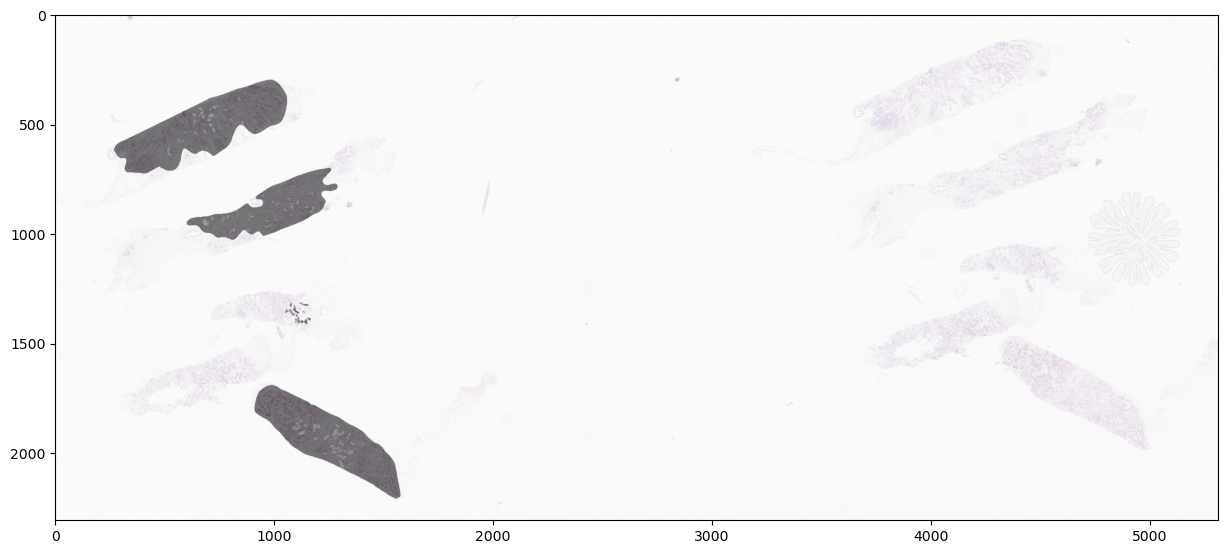

In [5]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread(mask_path)

plt.figure(figsize = (15,10))

plt.imshow(image, alpha =0.7)
plt.imshow(mask, alpha =0.5)
plt.show()

In [6]:
# mask 가 있는 사진 리스트 
have_mask = train_df[train_df['mask_path'] != '-' ]

mask_list = have_mask.mask_path.values.tolist()
have_mask

ID                     img_path                     mask_path  \
13   BC_01_0015  ./train_imgs/BC_01_0015.png  ./train_masks/BC_01_0015.png   
80   BC_01_0397  ./train_imgs/BC_01_0397.png  ./train_masks/BC_01_0397.png   
81   BC_01_0398  ./train_imgs/BC_01_0398.png  ./train_masks/BC_01_0398.png   
82   BC_01_0404  ./train_imgs/BC_01_0404.png  ./train_masks/BC_01_0404.png   
84   BC_01_0417  ./train_imgs/BC_01_0417.png  ./train_masks/BC_01_0417.png   
86   BC_01_0425  ./train_imgs/BC_01_0425.png  ./train_masks/BC_01_0425.png   
88   BC_01_0451  ./train_imgs/BC_01_0451.png  ./train_masks/BC_01_0451.png   
89   BC_01_0454  ./train_imgs/BC_01_0454.png  ./train_masks/BC_01_0454.png   
90   BC_01_0455  ./train_imgs/BC_01_0455.png  ./train_masks/BC_01_0455.png   
91   BC_01_0457  ./train_imgs/BC_01_0457.png  ./train_masks/BC_01_0457.png   
92   BC_01_0459  ./train_imgs/BC_01_0459.png  ./train_masks/BC_01_0459.png   
93   BC_01_0471  ./train_imgs/BC_01_0471.png  ./train_masks/BC_01_0471.png   
100  BC_01_0510  ./train_imgs/BC_01_0510.png  ./train_masks/BC_01_0510.png   
103  BC_01_0515  ./train_imgs/BC_01_0515.png  ./train_masks/BC_01_0515.png   
104  BC_01_0516  ./train_imgs/BC_01_0516.png  ./train_masks/BC_01_0516.png   
106  BC_01_0530  ./train_imgs/BC_01_0530.png  ./train_masks/BC_01_0530.png   
107  BC_01_0531  ./train_imgs/BC_01_0531.png  ./train_masks/BC_01_0531.png   
108  BC_01_0532  ./train_imgs/BC_01_0532.png  ./train_masks/BC_01_0532.png   
111  BC_01_0552  ./train_imgs/BC_01_0552.png  ./train_masks/BC_01_0552.png   
118  BC_01_0572  ./train_imgs/BC_01_0572.png  ./train_masks/BC_01_0572.png   
119  BC_01_0583  ./train_imgs/BC_01_0583.png  ./train_masks/BC_01_0583.png   
120  BC_01_0585  ./train_imgs/BC_01_0585.png  ./train_masks/BC_01_0585.png   
121  BC_01_0587  ./train_imgs/BC_01_0587.png  ./train_masks/BC_01_0587.png   
122  BC_01_0591  ./train_imgs/BC_01_0591.png  ./train_masks/BC_01_0591.png   
124  BC_01_0599  ./train_imgs/BC_01_0599.png  ./train_masks/BC_01_0599.png   
126  BC_01_0609  ./train_imgs/BC_01_0609.png  ./train_masks/BC_01_0609.png   
127  BC_01_0612  ./train_imgs/BC_01_0612.png  ./train_masks/BC_01_0612.png   
133  BC_01_0652  ./train_imgs/BC_01_0652.png  ./train_masks/BC_01_0652.png   
134  BC_01_0656  ./train_imgs/BC_01_0656.png  ./train_masks/BC_01_0656.png   
135  BC_01_0660  ./train_imgs/BC_01_0660.png  ./train_masks/BC_01_0660.png   
136  BC_01_0666  ./train_imgs/BC_01_0666.png  ./train_masks/BC_01_0666.png   
137  BC_01_0668  ./train_imgs/BC_01_0668.png  ./train_masks/BC_01_0668.png   
138  BC_01_0673  ./train_imgs/BC_01_0673.png  ./train_masks/BC_01_0673.png   
139  BC_01_0674  ./train_imgs/BC_01_0674.png  ./train_masks/BC_01_0674.png   
141  BC_01_0681  ./train_imgs/BC_01_0681.png  ./train_masks/BC_01_0681.png   
144  BC_01_0693  ./train_imgs/BC_01_0693.png  ./train_masks/BC_01_0693.png   
145  BC_01_0694  ./train_imgs/BC_01_0694.png  ./train_masks/BC_01_0694.png   
175  BC_01_0876  ./train_imgs/BC_01_0876.png  ./train_masks/BC_01_0876.png   
176  BC_01_0877  ./train_imgs/BC_01_0877.png  ./train_masks/BC_01_0877.png   
178  BC_01_0881  ./train_imgs/BC_01_0881.png  ./train_masks/BC_01_0881.png   
179  BC_01_0883  ./train_imgs/BC_01_0883.png  ./train_masks/BC_01_0883.png   
180  BC_01_0885  ./train_imgs/BC_01_0885.png  ./train_masks/BC_01_0885.png   
181  BC_01_0886  ./train_imgs/BC_01_0886.png  ./train_masks/BC_01_0886.png   
183  BC_01_0893  ./train_imgs/BC_01_0893.png  ./train_masks/BC_01_0893.png   
185  BC_01_0902  ./train_imgs/BC_01_0902.png  ./train_masks/BC_01_0902.png   
186  BC_01_0905  ./train_imgs/BC_01_0905.png  ./train_masks/BC_01_0905.png   
187  BC_01_0906  ./train_imgs/BC_01_0906.png  ./train_masks/BC_01_0906.png   
188  BC_01_0907  ./train_imgs/BC_01_0907.png  ./train_masks/BC_01_0907.png   
189  BC_01_0912  ./train_imgs/BC_01_0912.png  ./train_masks/BC_01_0912.png   
190  BC_01_0922  ./train_imgs/BC_01_0922.png  ./train_masks/BC_01_0922.png   
192  BC_01_0925  ./train_imgs/BC_01

In [7]:
have_mask['img_path'].iloc[0][1:]

'/train_imgs/BC_01_0015.png'

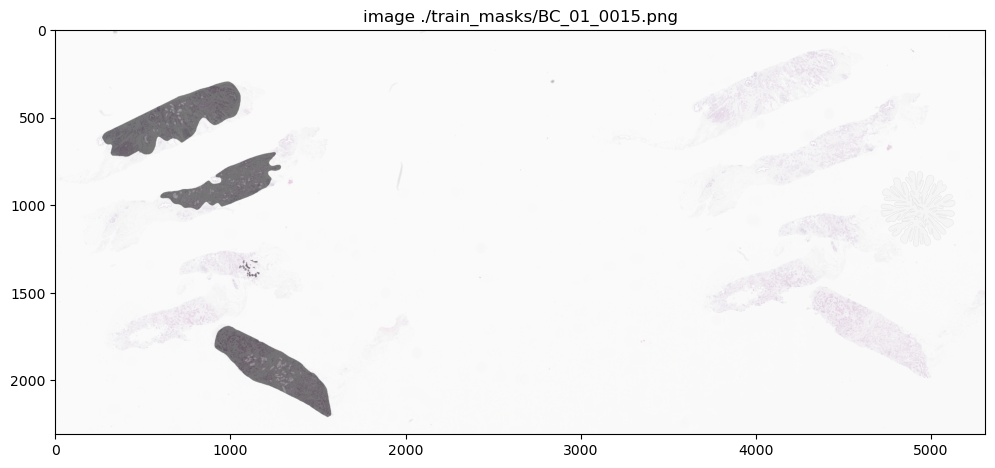

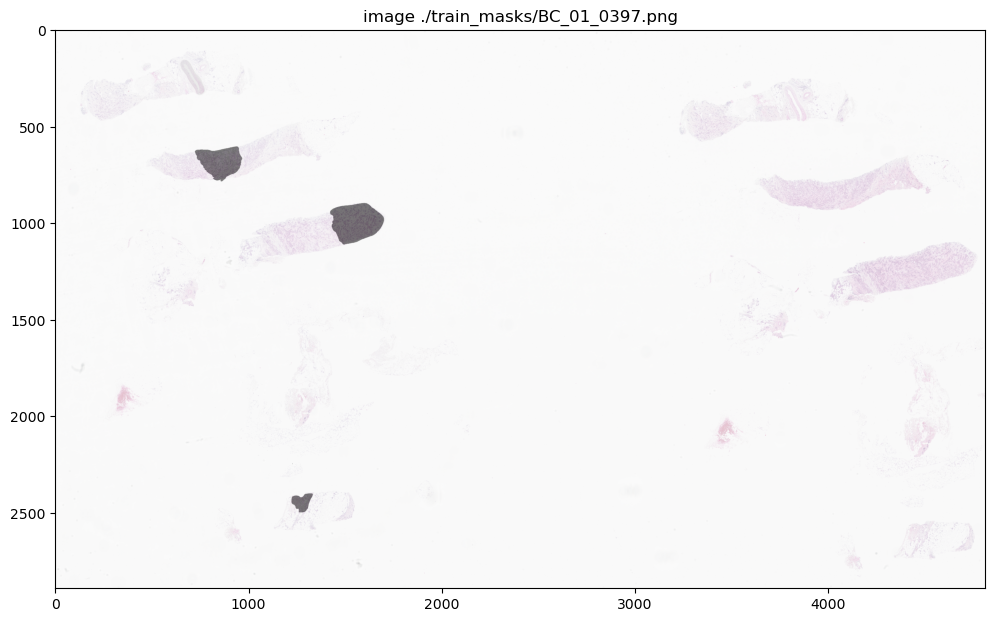

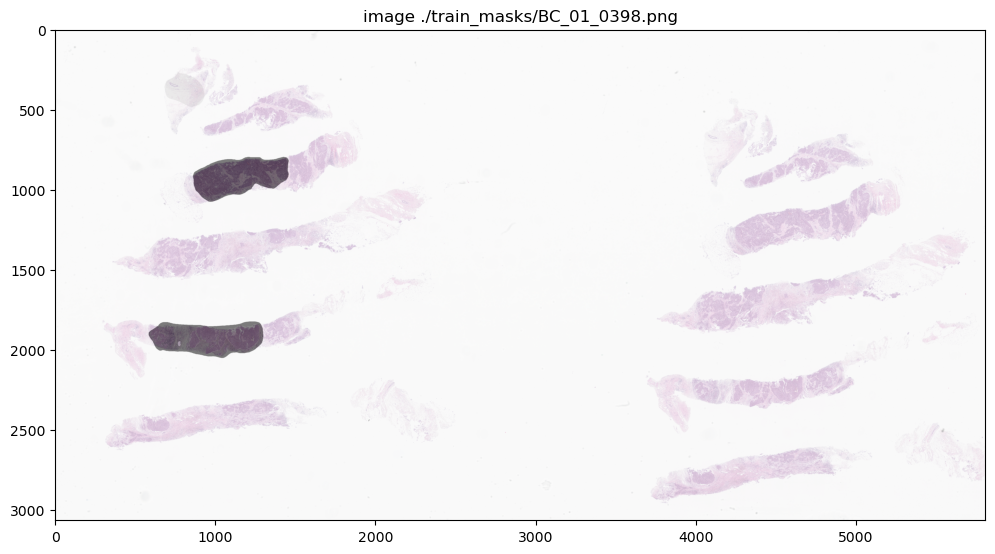

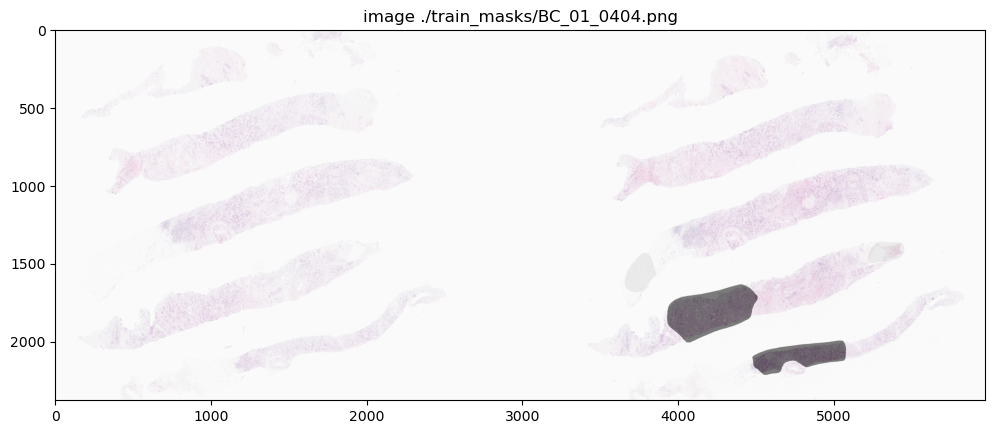

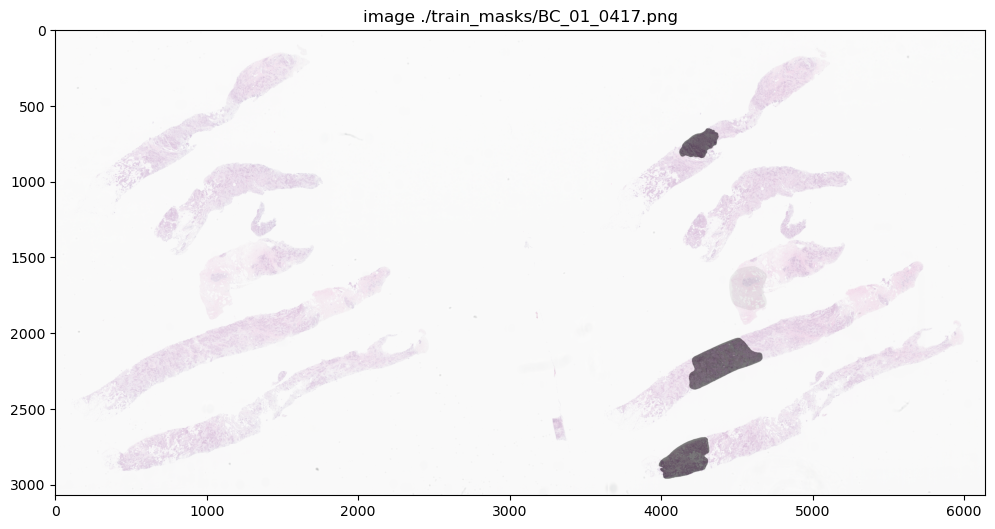

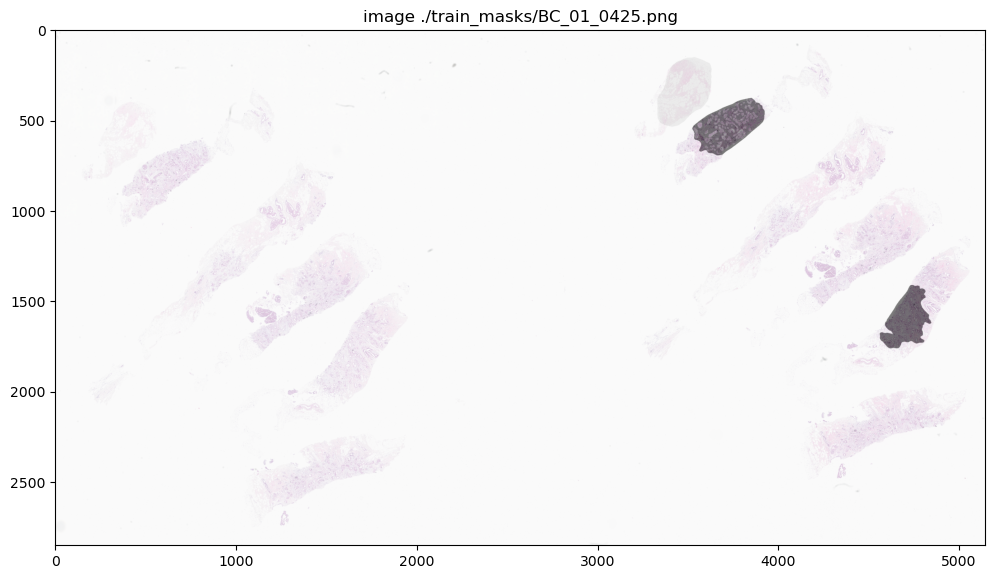

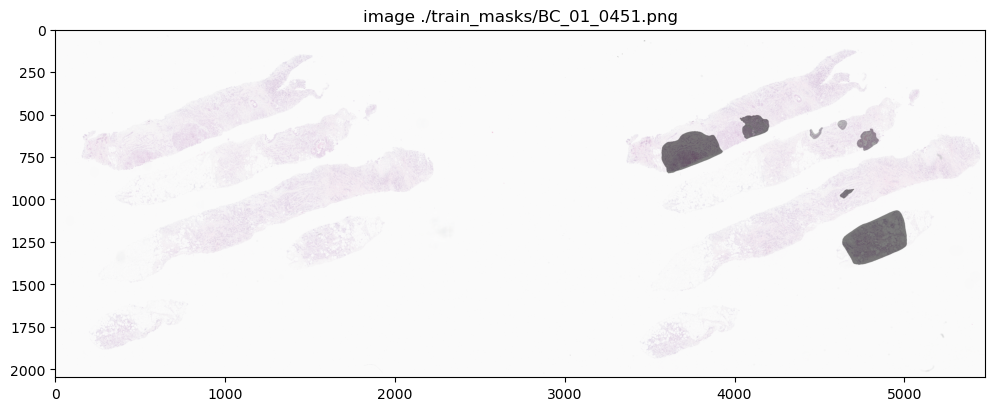

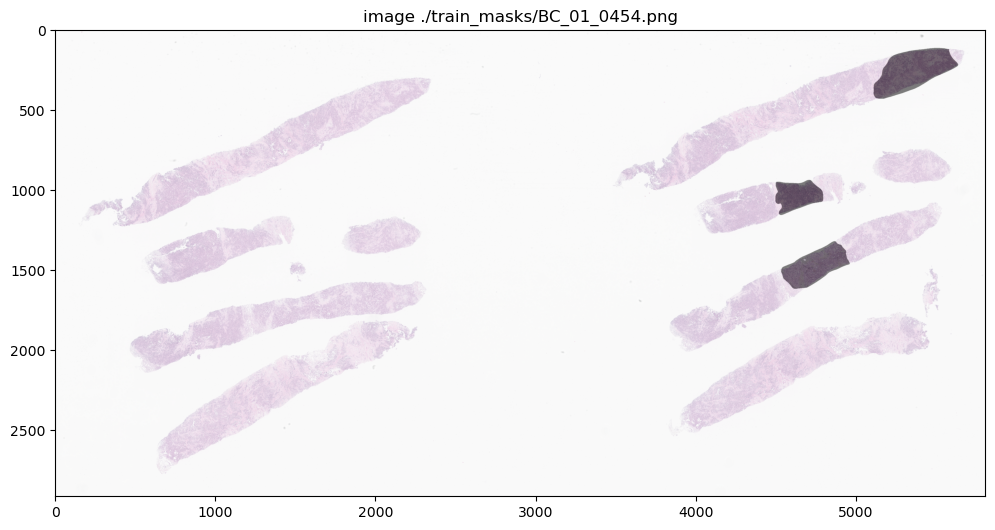

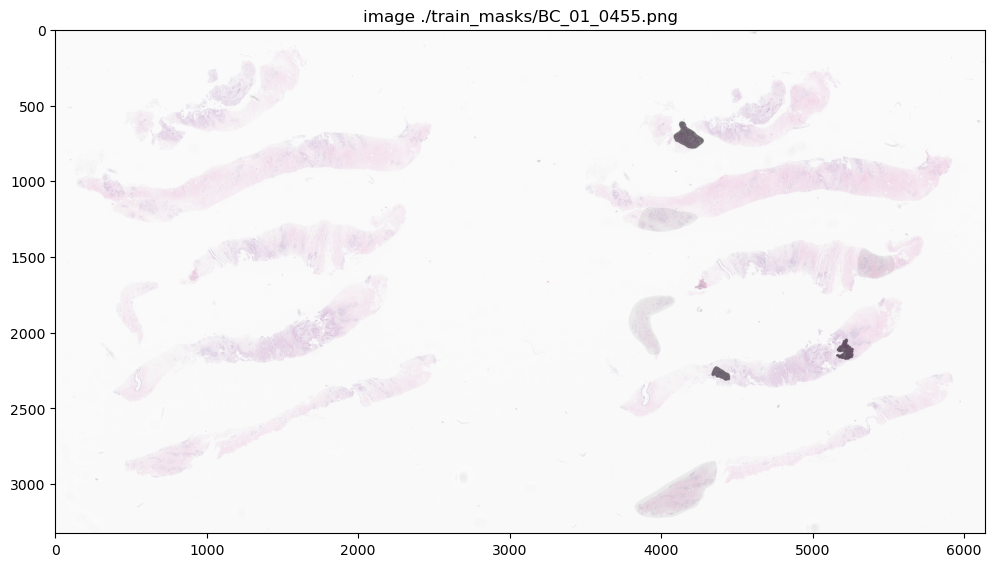

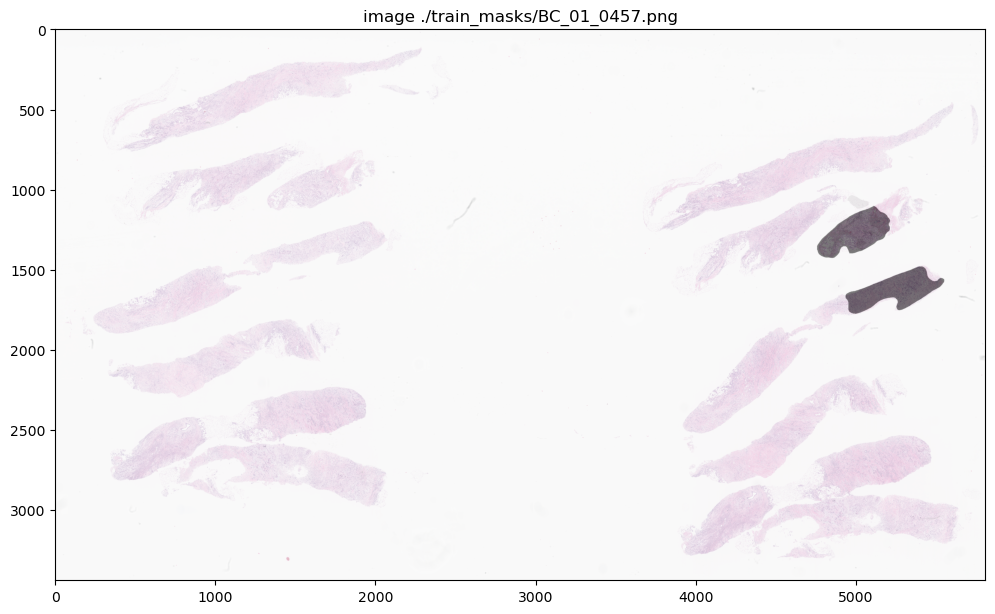

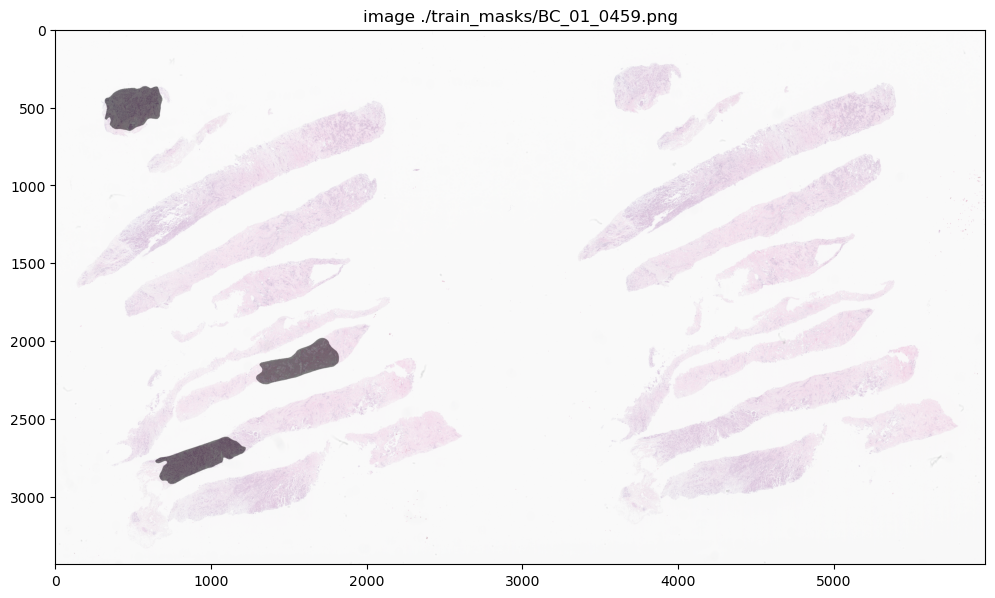

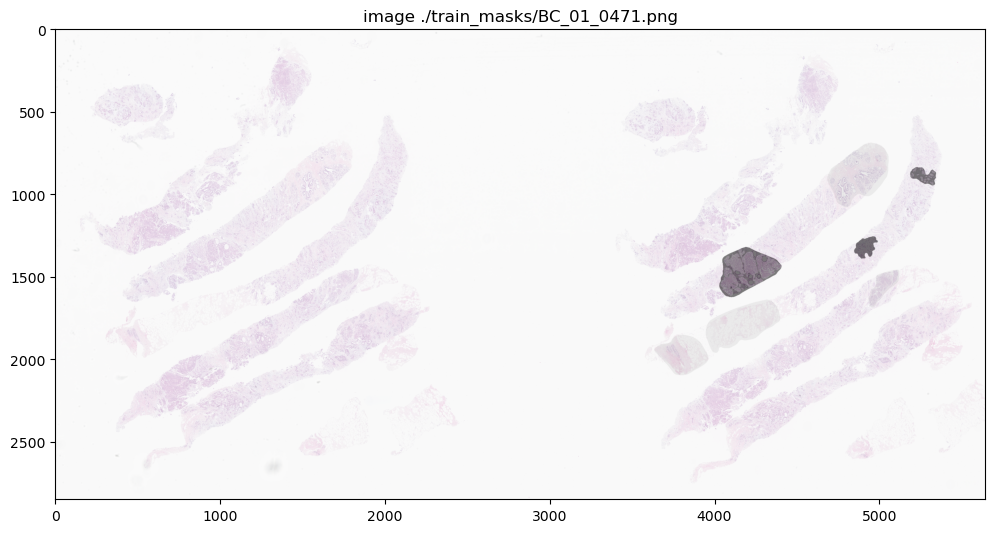

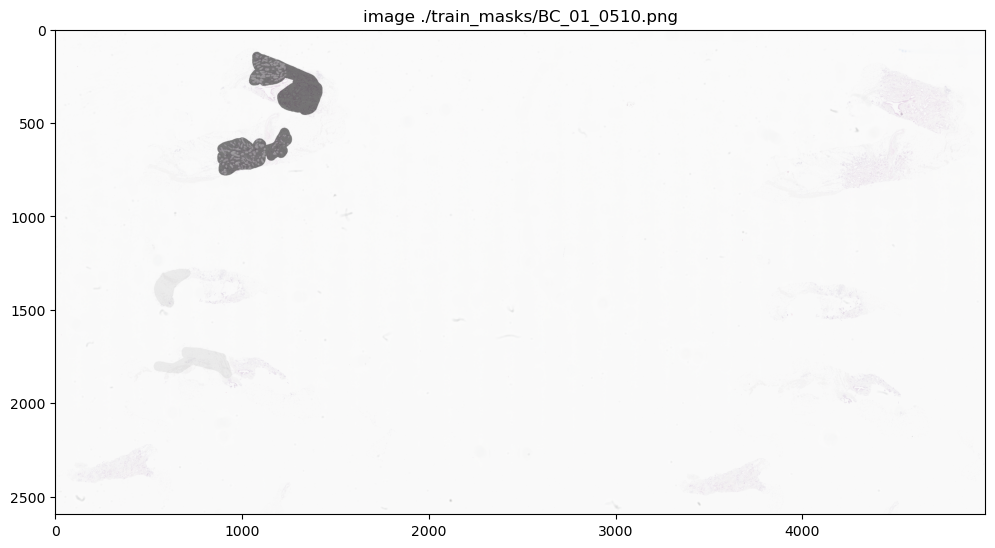

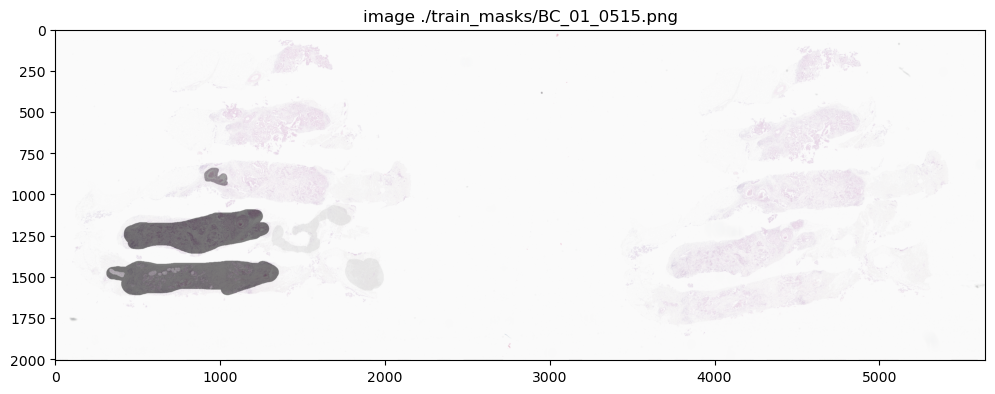

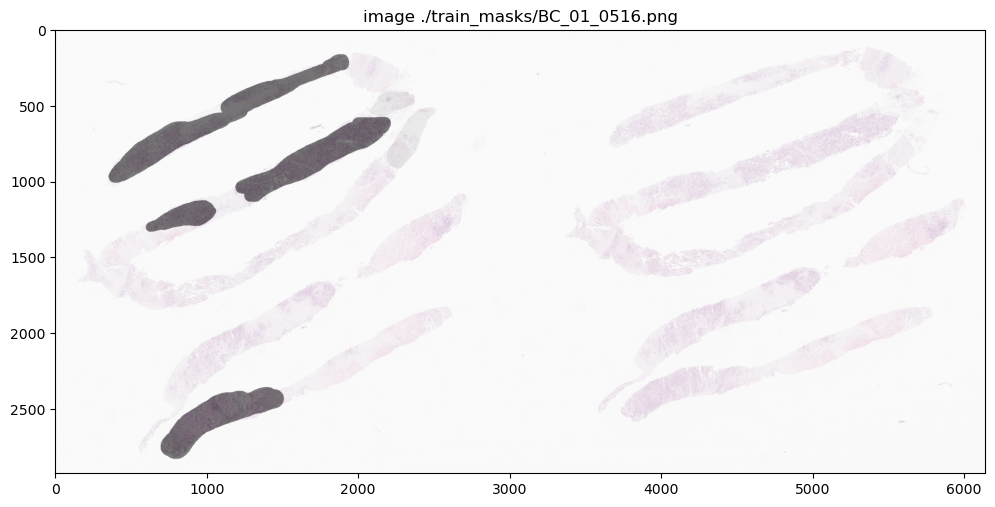

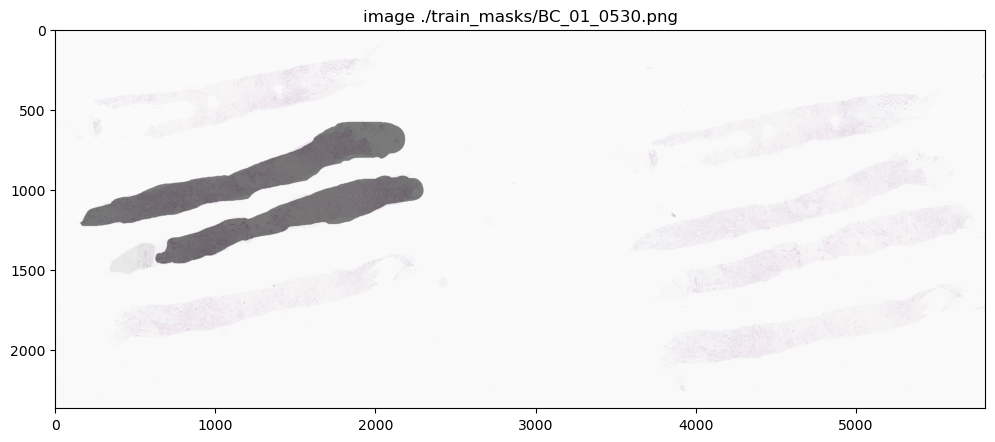

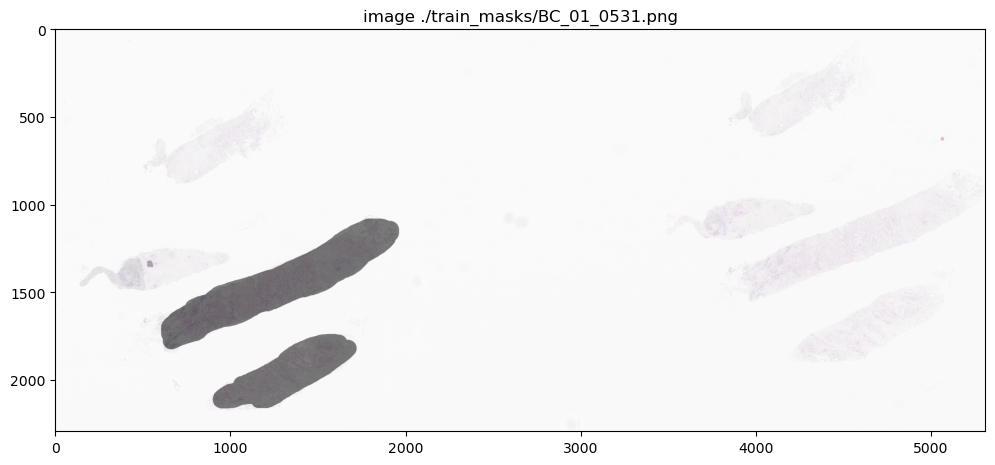

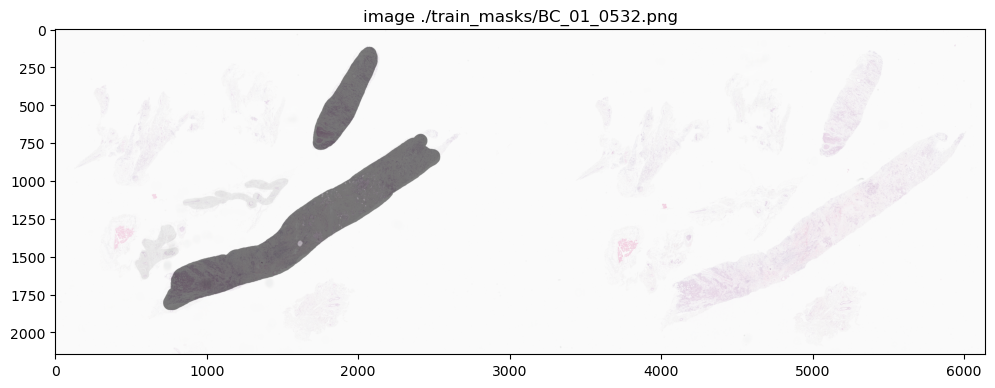

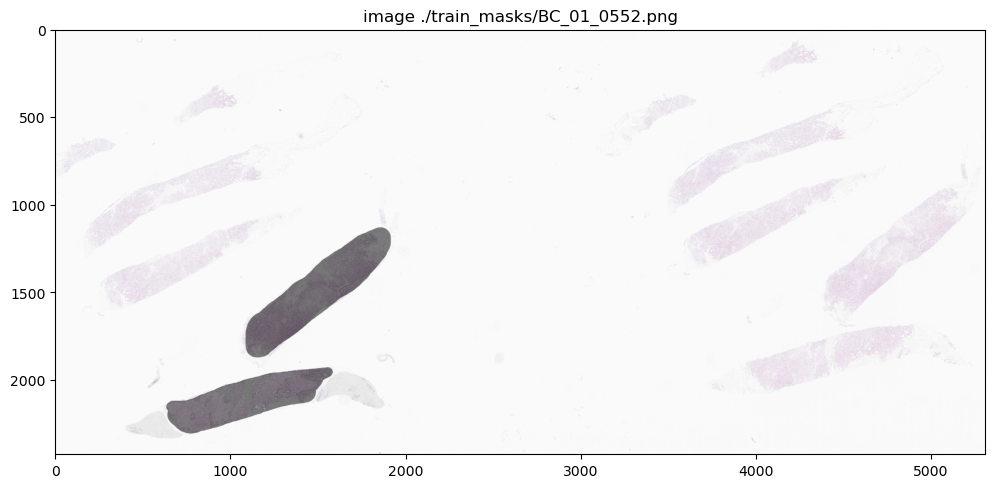

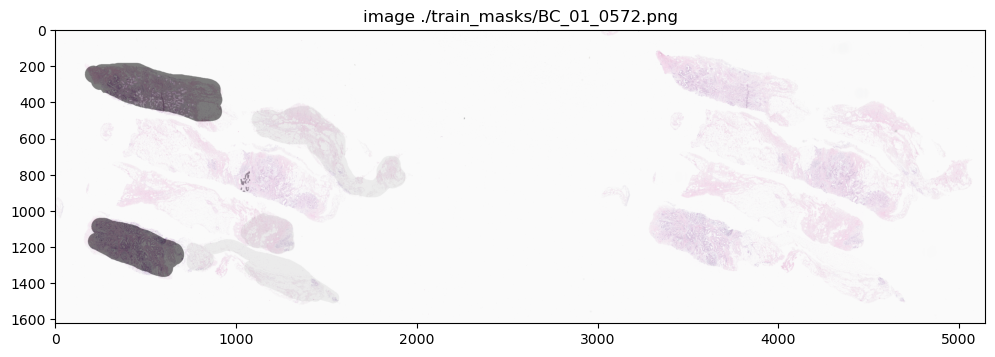

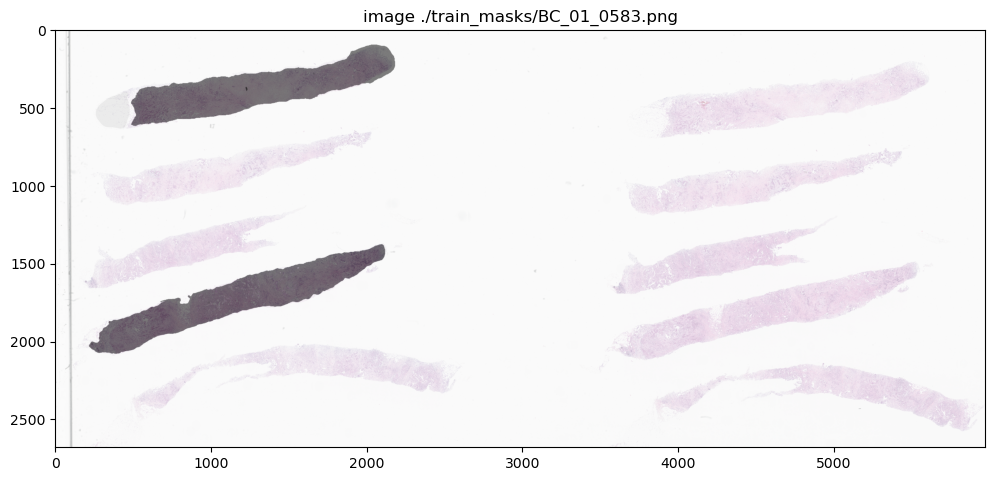

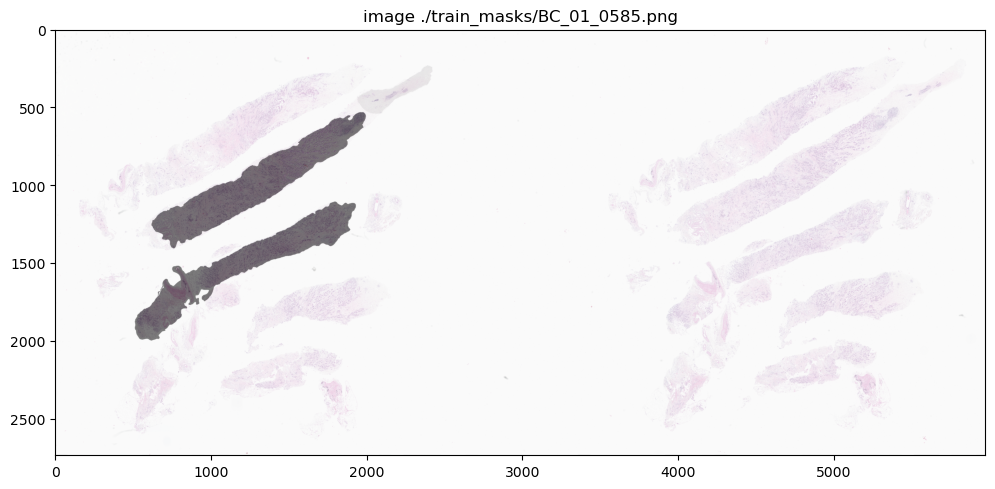

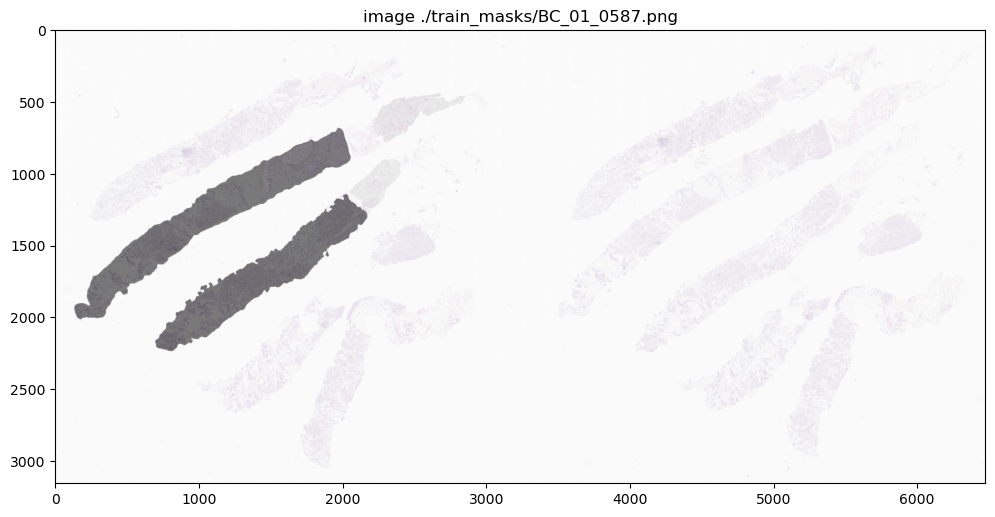

KeyboardInterrupt: 

In [8]:
for idx, img in enumerate(mask_list):
    only_img_path = base_path + have_mask['img_path'].iloc[idx][1:]
    only_mask_path = base_path + img[1:]
    image = cv2.imread(only_img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(only_mask_path)
    #mask = cv2.cvtColor(mask, cv2.COLOR_GRAYSCALE)
    plt.figure(figsize = (12,8))
    
    plt.title(f'image {img}')
    plt.imshow(image, alpha =0.7)
    plt.imshow(mask, alpha =0.5)
    plt.show()

In [ ]:
def line_detect():
    default_file = base_path + train_df['img_path'].iloc[13][1:]
    # filename = argv[0] if len(argv) > 0 else default_file

    # load image
    src = cv2.imread(default_file)

    # load success check
    if src is None:
        print("Error opening image")
        print("Usage: houghline_example.py" + default_file)
        return -1

    dst = cv2.Canny(src, 90, 190, None, 3)  # optimized in milk 019

    # Copy edges to the images that will dispaly the results in BGR
    cdst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    cdstP = np.copy(cdst)

    lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
            pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
            cv2.line(cdst, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)

    linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)

    if linesP is not None:
        for i in range(0, len(linesP)):
            li = linesP[i][0]
            cv2.line(cdstP, (li[0], li[1]), (li[2], li[3]), (0, 0, 255), 2, cv2.LINE_AA)

    fig, ax = plt.subplots(1,3, figsize = (30,20)) 

    ax[0].imshow(src)
    ax[1].imshow(cdst)
    ax[2].imshow(cdstP)

    plt.show()


In [ ]:
line_detect()

In [ ]:
# 배경 투명화 - 파일 크기는 늘어남 alpha 채널 추가때문에 

def bg_delete(file_path):

    file_list = os.walk(file_path)  # OS로 불러오기
    img_files = [file for file in file_list if file[-1][-1].endswith(".png")]
    

    if not img_files:  # if empty folder
        print("there are no png files")
        sys.exit()

    for i, f in enumerate(img_files[0][2]):
        # t.ly/zgLP
        orig_image = cv2.imread(file_path + f)  
        result = orig_image.copy()
        orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
        gray_sample = cv2.cvtColor(orig_image, cv2.COLOR_RGB2GRAY)

        # masked image 
        mask = cv2.threshold(gray_sample, 239, 255, cv2.THRESH_BINARY)[1]
        mask = 255 - mask

        kernel = np.ones((3,3), np.uint8)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

        mask = cv2.GaussianBlur(mask, (0,0), sigmaX=2, sigmaY = 2, borderType = cv2.BORDER_DEFAULT)

        #linear stretch - 이건 뭔말인지..
        mask = (2*(mask.astype(np.float32)) - 255.0).clip(0,255).astype(np.uint8)



        result = cv2.cvtColor(result, cv2.COLOR_BGR2BGRA)
        result[:,:,3] = mask
    print('done')
    return result

#         fg, ax = plt.subplots(1,2, figsize = (20,15))

#         ax[0].imshow(gray_sample) #, cmap = 'gray')
#         ax[1].imshow(result, cmap = 'gray')
#         plt.show()

In [ ]:
k_means('/Users/krc/Documents/breast_dacon/train_imgs')

--- 

## resize (background delete) - K means - score evaluation - apply crop

In [9]:
os.getcwd()

'/Users/krc/Documents/breast_dacon/dacon_bc_prediction'

In [10]:
from numpy.linalg import norm
import copy 

#From t.ly/TLq_


class KMeans():
    def __init__(self, n_clusters, max_iter = 20, random_state = 60):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
    def initialize_centroids(self, X): # center 초기화 - 이미지 내 특정 점으로 고정
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]

        return centroids
        
    def compute_centroids(self, X, labels): # centroids 계산 
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids
        
    def compute_distance(self, X, centroids): #
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
 
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
        # return self.labels
        
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [11]:
## train

file_path = '/Users/krc/Documents/breast_dacon/train_imgs/'
file_list = os.walk(file_path)  # OS로 불러오기
img_files = [file for file in file_list if file[-1][-1].endswith(".png")]

score_dict = {}

if not img_files:  # if empty folder
    print("there are no png files")
    sys.exit()

for i, f in enumerate(img_files[0][2]):
    # t.ly/zgLP
    score_list = []
    image = cv2.imread(file_path + f)
    y_orig, x_orig, channel= image.shape
    if x_orig / y_orig < 1.5:
        print(f'{f} is not cropped')
        score_dict[f] = copy.deepcopy(score_list)
        score_list.clear()
        continue
    gray_sample = image.copy()
    gray_sample = cv2.cvtColor(gray_sample, cv2.COLOR_RGB2GRAY)
    
    # 모양 맞추기 flip 
    gray_sample =cv2.flip(gray_sample, 0)
    # resize to 400 * 200
    gray_sample = cv2.resize(gray_sample, dsize=(400, 200), interpolation=cv2.INTER_LINEAR) 
    
    #전처리
    coord = np.where( gray_sample < 239 )
    co_array = np.array(coord)
    co_array = np.float32(co_array).T
    from sklearn.metrics import silhouette_samples, silhouette_score

    best_score = 0
    best_k = 1
    best_centroids = []

    for j, k in enumerate([ 4, 3, 2]):

        # Run the Kmeans algorithm
        km = KMeans(n_clusters=k)
        km.fit(co_array)
        labels = km.predict(co_array) # input data

        centroids = km.compute_centroids(co_array, labels) # cluster_centers_
        # Get silhouette samples
        silhouette_vals = silhouette_samples(co_array, labels)

        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals) ## score 
        score_list.append(avg_score)
        print('K = ',k, 'avg_score:', avg_score)

        if best_score < avg_score:
            if best_k == 3 and k ==2 and (avg_score-best_score) < 0.09:
                break
            best_score = avg_score
            best_k = k
            best_centroids = centroids
            x_coord = centroids[ : , 1]
            x_coord.sort()        
            if best_k == 2:
                x1, x2 = x_coord
            elif best_k ==3  :
                x1, x2, x3 = x_coord
            elif best_k ==4  :
                x1, x2, x3, x4 = x_coord

    score_dict[f] = copy.deepcopy(score_list)
    score_list.clear()
    if best_k == 2:
        crop_image = image[:, : int( (x1+x2)/2  *x_orig / 400 ), :]
    elif best_k > 2:
        # crop_image = image[:, int((x1+x2)/2 * x_orig/400): int((x2+x3/2)*x_orig/400), : ]
        # crop_image = image[:, int((x1+x3)/2 * x_orig/400) : , : ] #x1, x3 사이가 중간점
        alpha = int(y_orig / 2)
        crop_image = image[:, max(0, int(x2 *x_orig /400) -alpha)  :int(x2 *x_orig /400) +alpha , : ] ## 마이너스나옴 

        
    print(f'image {f} beset centroids : ', best_centroids)
    #plt.title(f'{f} image result')
    #plt.imshow(crop_image)
    #plt.show()
    
    

K =  4 avg_score: 0.45947185
K =  3 avg_score: 0.48830158
K =  2 avg_score: 0.50131357
image BC_01_3134.png beset centroids :  [[113.1212616   59.73654175]
 [ 86.72594452 193.37864685]
 [ 81.43476868 324.49765015]]
K =  4 avg_score: 0.5364646
K =  3 avg_score: 0.5436186
K =  2 avg_score: 0.7051146
image BC_01_1045.png beset centroids :  [[110.03251648  75.10638428]
 [109.32136536 320.79574585]]
K =  4 avg_score: 0.38469502
K =  3 avg_score: 0.4964757
K =  2 avg_score: 0.6373189
image BC_01_2202.png beset centroids :  [[ 97.04637146  99.82246399]
 [ 75.55081177 314.53848267]]
K =  4 avg_score: 0.46417093
K =  3 avg_score: 0.55652887
K =  2 avg_score: 0.68951035
image BC_01_2216.png beset centroids :  [[ 84.4900589   87.2514267 ]
 [ 98.49259186 323.01321411]]
K =  4 avg_score: 0.49552283
K =  3 avg_score: 0.5244596
K =  2 avg_score: 0.665905
image BC_01_2570.png beset centroids :  [[122.76972961  93.92260742]
 [111.93877411 314.77719116]]
BC_01_1092.png is not cropped
K =  4 avg_score: 0

K =  4 avg_score: 0.49423274
K =  3 avg_score: 0.52571267
K =  2 avg_score: 0.51322025
image BC_01_3069.png beset centroids :  [[103.09910583  68.6590271 ]
 [ 89.01751709 201.67390442]
 [ 95.57189178 335.51541138]]
K =  4 avg_score: 0.4654666
K =  3 avg_score: 0.5267546
K =  2 avg_score: 0.53212196
image BC_01_3041.png beset centroids :  [[106.3274231   70.66023254]
 [124.29888916 204.46359253]
 [ 91.80661011 338.91430664]]
K =  4 avg_score: 0.5020275
K =  3 avg_score: 0.5140431
K =  2 avg_score: 0.70419645
image BC_01_2439.png beset centroids :  [[113.96279144  94.30859375]
 [109.73711395 298.44940186]]
K =  4 avg_score: 0.50657135
K =  3 avg_score: 0.5094918
K =  2 avg_score: 0.6331512
image BC_01_2808.png beset centroids :  [[ 91.23149109  98.59809875]
 [112.0344696  317.40008545]]
K =  4 avg_score: 0.63524324
K =  3 avg_score: 0.7659091
K =  2 avg_score: 0.6198482
image BC_01_2820.png beset centroids :  [[ 52.41752243  59.88277817]
 [101.27198029 222.51170349]
 [150.56536865 376.15

K =  4 avg_score: 0.44466633
K =  3 avg_score: 0.5308371
K =  2 avg_score: 0.63404065
image BC_01_0012.png beset centroids :  [[104.13959503  88.37570953]
 [108.68947601 311.84005737]]
K =  4 avg_score: 0.5257356
K =  3 avg_score: 0.54601204
K =  2 avg_score: 0.71791357
image BC_01_0006.png beset centroids :  [[115.14911652 109.56154633]
 [ 98.423172   333.5484314 ]]
K =  4 avg_score: 0.5330605
K =  3 avg_score: 0.6197427
K =  2 avg_score: 0.55980515
image BC_01_0760.png beset centroids :  [[102.97937012  62.06555176]
 [133.01779175 202.96064758]
 [ 80.12467957 340.18392944]]
K =  4 avg_score: 0.36748514
K =  3 avg_score: 0.50328845
K =  2 avg_score: 0.6719412
image BC_01_1495.png beset centroids :  [[101.15351105  98.28222656]
 [ 96.7907486  313.17419434]]
K =  4 avg_score: 0.5054095
K =  3 avg_score: 0.55577195
K =  2 avg_score: 0.5130839
image BC_01_2822.png beset centroids :  [[ 96.49003601  49.50031281]
 [103.42901611 199.22351074]
 [105.52162933 342.90591431]]
K =  4 avg_score: 0

K =  4 avg_score: 0.37767646
K =  3 avg_score: 0.46628413
K =  2 avg_score: 0.6829059
image BC_01_2576.png beset centroids :  [[ 82.63844299  83.53298187]
 [120.99468231 314.84146118]]
K =  4 avg_score: 0.5151044
K =  3 avg_score: 0.59378785
K =  2 avg_score: 0.6801837
image BC_01_0375.png beset centroids :  [[ 32.66666794  99.39575195]
 [104.7412262  313.63754272]
 [125.24928284 334.02752686]]
K =  4 avg_score: 0.4571958
K =  3 avg_score: 0.44921237
K =  2 avg_score: 0.5604158
image BC_01_2204.png beset centroids :  [[114.30007172  90.98752594]
 [ 93.84135437 301.10247803]]
K =  4 avg_score: 0.3956266
K =  3 avg_score: 0.5310857
K =  2 avg_score: 0.673691
image BC_01_2238.png beset centroids :  [[ 92.35401154  92.73207092]
 [117.24275208 312.46469116]]
K =  4 avg_score: 0.5218546
K =  3 avg_score: 0.47236463
K =  2 avg_score: 0.6449495
image BC_01_3126.png beset centroids :  [[105.73537445 133.76953125]
 [ 89.34570312 321.99591064]]
K =  4 avg_score: 0.48172322
K =  3 avg_score: 0.516

K =  4 avg_score: 0.3819611
K =  3 avg_score: 0.4588406
K =  2 avg_score: 0.6606207
image BC_01_2198.png beset centroids :  [[ 75.60508728  87.26464844]
 [100.92788696 305.1555481 ]]
K =  4 avg_score: 0.5202138
K =  3 avg_score: 0.5449636
K =  2 avg_score: 0.65298676
image BC_01_0980.png beset centroids :  [[101.49317932  86.74406433]
 [ 91.81185913 306.88546753]]
K =  4 avg_score: 0.44665292
K =  3 avg_score: 0.5647731
K =  2 avg_score: 0.7120669
image BC_01_0002.png beset centroids :  [[101.84398651  85.11487579]
 [ 86.60731506 314.95379639]]
K =  4 avg_score: 0.53398436
K =  3 avg_score: 0.5592855
K =  2 avg_score: 0.7174959
image BC_01_1308.png beset centroids :  [[128.26109314  81.28160858]
 [134.15808105 312.28207397]]
K =  4 avg_score: 0.41060877
K =  3 avg_score: 0.51999086
K =  2 avg_score: 0.6600051
image BC_01_2167.png beset centroids :  [[ 99.87436676  96.96898651]
 [ 86.7951355  310.91333008]]
K =  4 avg_score: 0.5263911
K =  3 avg_score: 0.5820987
K =  2 avg_score: 0.5577

K =  4 avg_score: 0.39645985
K =  3 avg_score: 0.42600545
K =  2 avg_score: 0.5112737
image BC_01_3051.png beset centroids :  [[ 80.38267517  63.54833984]
 [ 80.3508606  194.6075592 ]
 [ 95.63560486 326.98666382]]
K =  4 avg_score: 0.5333289
K =  3 avg_score: 0.52321064
K =  2 avg_score: 0.6987295
image BC_01_2429.png beset centroids :  [[100.15991211  89.83179474]
 [101.4905014  319.79629517]]
K =  4 avg_score: 0.58155066
K =  3 avg_score: 0.5867268
K =  2 avg_score: 0.7617584
image BC_01_1120.png beset centroids :  [[ 82.34557343  75.87352753]
 [111.59338379 328.85192871]]
K =  4 avg_score: 0.45021427
K =  3 avg_score: 0.5108761
K =  2 avg_score: 0.4742206
image BC_01_3045.png beset centroids :  [[110.68980408  73.6741333 ]
 [ 91.2487793  213.40493774]
 [ 99.59381104 341.9949646 ]]
K =  4 avg_score: 0.48823437
K =  3 avg_score: 0.5640038
K =  2 avg_score: 0.6762043
image BC_01_1875.png beset centroids :  [[ 91.16383362  87.085289  ]
 [ 98.63167572 310.44970703]]
K =  4 avg_score: 0.5

K =  4 avg_score: 0.4714495
K =  3 avg_score: 0.51987725
K =  2 avg_score: 0.5333657
image BC_01_2922.png beset centroids :  [[ 87.94680023  76.06474304]
 [ 60.7454071  201.80194092]
 [117.09900665 328.42788696]]
K =  4 avg_score: 0.37247032
K =  3 avg_score: 0.48269346
K =  2 avg_score: 0.6837121
image BC_01_1595.png beset centroids :  [[ 88.7443924   95.50820923]
 [ 93.99404144 326.61419678]]
K =  4 avg_score: 0.47719175
K =  3 avg_score: 0.5283683
K =  2 avg_score: 0.5320154
image BC_01_2936.png beset centroids :  [[118.92006683  80.18981171]
 [ 78.00776672 213.01211548]
 [ 87.49131775 340.0765686 ]]
K =  4 avg_score: 0.55413634
K =  3 avg_score: 0.60759
K =  2 avg_score: 0.5457005
image BC_01_2895.png beset centroids :  [[ 94.17263794  59.28001404]
 [ 88.10591888 198.57347107]
 [101.22097778 341.91748047]]
K =  4 avg_score: 0.5479244
K =  3 avg_score: 0.6064307
K =  2 avg_score: 0.56592566
image BC_01_3235.png beset centroids :  [[ 97.73536682  51.945961  ]
 [ 71.46478271 196.01701

K =  3 avg_score: 0.55701894
K =  2 avg_score: 0.6830951
image BC_01_1966.png beset centroids :  [[110.51226044  84.18351746]
 [113.72862244 321.87368774]]
K =  4 avg_score: 0.5072905
K =  3 avg_score: 0.56228805
K =  2 avg_score: 0.5369029
image BC_01_3195.png beset centroids :  [[ 78.60736847  60.69809341]
 [ 88.3335495  196.88201904]
 [ 92.8742981  336.16485596]]
K =  4 avg_score: 0.5330906
K =  3 avg_score: 0.53641534
K =  2 avg_score: 0.7145679
image BC_01_1796.png beset centroids :  [[ 79.74829865  84.88860321]
 [ 91.76600647 318.81091309]]
K =  4 avg_score: 0.48783886
K =  3 avg_score: 0.5082217
K =  2 avg_score: 0.6741748
image BC_01_0305.png beset centroids :  [[ 83.40014648  83.49549103]
 [ 93.68123627 320.5479126 ]]
K =  4 avg_score: 0.45284697
K =  3 avg_score: 0.5292827
K =  2 avg_score: 0.64916945
image BC_01_3156.png beset centroids :  [[ 88.52497864  85.03967285]
 [112.52677917 302.11468506]]
K =  4 avg_score: 0.4480472
K =  3 avg_score: 0.53232634
K =  2 avg_score: 0.6

K =  3 avg_score: 0.53224736
K =  2 avg_score: 0.50985324
image BC_01_0702.png beset centroids :  [[ 86.51833344  60.69764328]
 [ 76.30062103 195.73187256]
 [101.36303711 332.73074341]]
K =  4 avg_score: 0.37342408
K =  3 avg_score: 0.52292275
K =  2 avg_score: 0.68390185
image BC_01_2673.png beset centroids :  [[ 93.08355713 100.20973969]
 [ 99.01266479 310.38024902]]
K =  4 avg_score: 0.5569288
K =  3 avg_score: 0.5884408
K =  2 avg_score: 0.5287111
image BC_01_2667.png beset centroids :  [[ 87.39767456  69.655159  ]
 [127.43064117 210.18721008]
 [105.62095642 349.82873535]]
K =  4 avg_score: 0.5306658
K =  3 avg_score: 0.5746044
K =  2 avg_score: 0.65643376
image BC_01_2101.png beset centroids :  [[ 70.4393692   77.91886902]
 [101.48862457 114.84007263]
 [162.30989075 321.02258301]]
K =  4 avg_score: 0.5354269
K =  3 avg_score: 0.55503917
K =  2 avg_score: 0.6869132
image BC_01_1346.png beset centroids :  [[101.07302094  90.9094696 ]
 [ 96.39493561 314.71002197]]
K =  4 avg_score: 0

K =  4 avg_score: 0.53579307
K =  3 avg_score: 0.5633331
K =  2 avg_score: 0.7129221
image BC_01_0262.png beset centroids :  [[119.35974884  87.35635376]
 [ 99.4959259  319.85845947]]
K =  4 avg_score: 0.55891585
K =  3 avg_score: 0.5463318
K =  2 avg_score: 0.70546174
image BC_01_1154.png beset centroids :  [[101.1284256   78.85191345]
 [ 95.99798584 321.11740112]]
K =  4 avg_score: 0.39444664
K =  3 avg_score: 0.46641454
K =  2 avg_score: 0.61913204
image BC_01_1632.png beset centroids :  [[ 95.58236694  90.48056793]
 [ 91.61103821 311.51333618]]
K =  4 avg_score: 0.52080697
K =  3 avg_score: 0.60636246
K =  2 avg_score: 0.53513527
image BC_01_3025.png beset centroids :  [[ 76.28905487  59.94156265]
 [ 74.73465729 202.78419495]
 [ 99.15292358 342.12155151]]
K =  4 avg_score: 0.43134093
K =  3 avg_score: 0.47147894
K =  2 avg_score: 0.51883113
image BC_01_3031.png beset centroids :  [[ 84.98715973  71.41150665]
 [ 66.206604   201.87255859]
 [ 69.2692337  330.60180664]]
K =  4 avg_scor

K =  4 avg_score: 0.45674884
K =  3 avg_score: 0.55429775
K =  2 avg_score: 0.6616928
image BC_01_1962.png beset centroids :  [[ 98.813591    94.63130188]
 [100.48105621 316.76422119]]
K =  4 avg_score: 0.37404954
K =  3 avg_score: 0.51928824
K =  2 avg_score: 0.6732907
image BC_01_2066.png beset centroids :  [[104.95223999  83.2483902 ]
 [105.22844696 303.05285645]]
K =  4 avg_score: 0.5719504
K =  3 avg_score: 0.59005815
K =  2 avg_score: 0.71593094
image BC_01_1209.png beset centroids :  [[108.58813477  77.18318939]
 [ 86.12355804 327.10769653]]
K =  4 avg_score: 0.48709312
K =  3 avg_score: 0.53575003
K =  2 avg_score: 0.49848908
image BC_01_2700.png beset centroids :  [[111.89845276  62.75617218]
 [101.99416351 212.27767944]
 [102.40821838 354.3855896 ]]
K =  4 avg_score: 0.45651317
K =  3 avg_score: 0.45768547
K =  2 avg_score: 0.4967696
image BC_01_2728.png beset centroids :  [[ 82.05664825  76.84055328]
 [ 75.12328339 214.02597046]
 [ 96.05438232 345.287323  ]]
K =  4 avg_score

K =  4 avg_score: 0.51316863
K =  3 avg_score: 0.5623522
K =  2 avg_score: 0.5367774
image BC_01_2932.png beset centroids :  [[107.60309601  61.79664612]
 [105.21685028 197.97746277]
 [107.48975372 336.43035889]]
K =  4 avg_score: 0.49439284
K =  3 avg_score: 0.59091437
K =  2 avg_score: 0.681983
image BC_01_1585.png beset centroids :  [[ 94.72576904  83.77638245]
 [ 75.69908905 312.86968994]]
K =  4 avg_score: 0.41189435
K =  3 avg_score: 0.47962457
K =  2 avg_score: 0.54872036
image BC_01_2926.png beset centroids :  [[122.6661911   77.51695251]
 [ 97.50500488 203.23114014]
 [ 70.65547943 328.64733887]]
K =  4 avg_score: 0.5011131
K =  3 avg_score: 0.5698419
K =  2 avg_score: 0.56379837
image BC_01_2729.png beset centroids :  [[120.7877655   72.85877228]
 [ 80.59522247 219.84999084]
 [ 90.57315063 348.81802368]]
BC_01_0880.png is not cropped
K =  4 avg_score: 0.44945216
K =  3 avg_score: 0.5293381
K =  2 avg_score: 0.63546413
image BC_01_1552.png beset centroids :  [[ 90.99546814  95.

K =  4 avg_score: 0.523986
K =  3 avg_score: 0.5168941
K =  2 avg_score: 0.63498676
image BC_01_0292.png beset centroids :  [[ 85.71177673  95.25358582]
 [ 97.63105011 323.14672852]]
K =  4 avg_score: 0.5384681
K =  3 avg_score: 0.5279235
K =  2 avg_score: 0.7047525
image BC_01_1832.png beset centroids :  [[ 85.72989655  92.24842072]
 [104.95011902 317.8442688 ]]
K =  4 avg_score: 0.40194696
K =  3 avg_score: 0.5545801
K =  2 avg_score: 0.7084986
image BC_01_1827.png beset centroids :  [[104.17880249  88.87195587]
 [ 84.32474518 319.15426636]]
K =  4 avg_score: 0.4695068
K =  3 avg_score: 0.5197668
K =  2 avg_score: 0.63652843
image BC_01_0287.png beset centroids :  [[102.3731308   82.82350159]
 [ 99.01000214 298.01000977]]
K =  4 avg_score: 0.47792423
K =  3 avg_score: 0.54325974
K =  2 avg_score: 0.67457974
image BC_01_1199.png beset centroids :  [[104.91532898  94.7649231 ]
 [100.8086319  315.22476196]]
K =  4 avg_score: 0.34063363
K =  3 avg_score: 0.5197966
K =  2 avg_score: 0.689

K =  3 avg_score: 0.5272989
K =  2 avg_score: 0.69527036
image BC_01_0656.png beset centroids :  [[ 81.85430908  79.82802582]
 [ 84.07907867 313.92050171]]
K =  4 avg_score: 0.49191216
K =  3 avg_score: 0.5203419
K =  2 avg_score: 0.505036
image BC_01_2727.png beset centroids :  [[118.44741821  65.67900848]
 [106.94979858 193.93916321]
 [ 97.7700119  324.82653809]]
K =  4 avg_score: 0.58294654
K =  3 avg_score: 0.6705779
K =  2 avg_score: 0.5635394
image BC_01_2900.png beset centroids :  [[119.08266449  50.78334808]
 [101.51654053 204.65153503]
 [ 86.29040527 355.59170532]]
K =  4 avg_score: 0.4535554
K =  3 avg_score: 0.51273626
K =  2 avg_score: 0.54101616
image BC_01_2928.png beset centroids :  [[101.57496643  72.06639862]
 [ 78.72995758 199.15306091]
 [126.28347015 332.4342041 ]]
K =  4 avg_score: 0.401398
K =  3 avg_score: 0.51775867
K =  2 avg_score: 0.6476199
image BC_01_0681.png beset centroids :  [[ 95.42192078  93.08209229]
 [ 91.52671814 312.42364502]]
K =  4 avg_score: 0.39

K =  4 avg_score: 0.53351945
K =  3 avg_score: 0.628076
K =  2 avg_score: 0.54049146
image BC_01_0694.png beset centroids :  [[ 86.44451904  53.05786133]
 [103.62508392 201.8117981 ]
 [ 57.7408371  344.6151123 ]]
K =  4 avg_score: 0.44845182
K =  3 avg_score: 0.4474565
K =  2 avg_score: 0.55093986
image BC_01_2929.png beset centroids :  [[ 84.0114212  100.85650635]
 [ 98.06059265 299.02304077]]
K =  4 avg_score: 0.43996507
K =  3 avg_score: 0.5211525
K =  2 avg_score: 0.51289827
image BC_01_2901.png beset centroids :  [[ 93.91266632  53.33486557]
 [110.51493835 190.27787781]
 [143.83587646 329.50579834]]
K =  4 avg_score: 0.4803988
K =  3 avg_score: 0.56577384
K =  2 avg_score: 0.66733164
image BC_01_2040.png beset centroids :  [[ 89.60441589  79.73615265]
 [ 94.74042511 293.38571167]]
K =  4 avg_score: 0.48425937
K =  3 avg_score: 0.5337049
K =  2 avg_score: 0.5362319
image BC_01_2726.png beset centroids :  [[129.07310486  65.01372528]
 [ 94.68424225 196.46401978]
 [ 79.74646759 326.3

K =  4 avg_score: 0.52785414
K =  3 avg_score: 0.54507077
K =  2 avg_score: 0.70924634
image BC_01_0530.png beset centroids :  [[108.21276093  85.05369568]
 [ 92.89680481 321.20480347]]
K =  4 avg_score: 0.3790985
K =  3 avg_score: 0.5177885
K =  2 avg_score: 0.66618145
image BC_01_2864.png beset centroids :  [[ 90.44958496  97.36503601]
 [103.41707611 313.16635132]]
K =  4 avg_score: 0.41833296
K =  3 avg_score: 0.5230646
K =  2 avg_score: 0.651081
image BC_01_1389.png beset centroids :  [[102.35159302  94.25443268]
 [109.6360321  310.31552124]]
K =  4 avg_score: 0.41974255
K =  3 avg_score: 0.49645573
K =  2 avg_score: 0.53796434
image BC_01_2858.png beset centroids :  [[ 89.65568542  71.60480499]
 [ 77.55734253 202.85513306]
 [ 90.6470871  328.56088257]]
K =  4 avg_score: 0.45881668
K =  3 avg_score: 0.47759762
K =  2 avg_score: 0.526167
image BC_01_2680.png beset centroids :  [[ 68.6485672   64.25189972]
 [ 99.07802582 193.68641663]
 [ 85.91345215 323.74099731]]
K =  4 avg_score: 0

K =  4 avg_score: 0.40073973
K =  3 avg_score: 0.50333756
K =  2 avg_score: 0.6594208
image BC_01_0532.png beset centroids :  [[ 90.86398315  89.89512634]
 [ 93.87522125 308.12866211]]
BC_01_2325.png is not cropped
K =  4 avg_score: 0.4460789
K =  3 avg_score: 0.557925
K =  2 avg_score: 0.7105539
image BC_01_0254.png beset centroids :  [[116.12405396  80.64086914]
 [ 76.58193207 293.40374756]]
K =  4 avg_score: 0.4745009
K =  3 avg_score: 0.5059616
K =  2 avg_score: 0.5159897
image BC_01_3013.png beset centroids :  [[ 70.61877441  66.62915802]
 [101.1137619  202.89323425]
 [ 84.43830872 335.76550293]]
K =  4 avg_score: 0.49599746
K =  3 avg_score: 0.53763324
K =  2 avg_score: 0.52212775
image BC_01_3007.png beset centroids :  [[ 79.23361969  73.56845856]
 [104.17762756 207.13830566]
 [131.36030579 341.71713257]]
BC_01_0268.png is not cropped
K =  4 avg_score: 0.4883202
K =  3 avg_score: 0.55646783
K =  2 avg_score: 0.67693025
image BC_01_2494.png beset centroids :  [[104.35264587  88.6

K =  2 avg_score: 0.64951164
image BC_01_1716.png beset centroids :  [[ 81.91611481  89.2117691 ]
 [ 96.11419678 297.26187134]]
K =  4 avg_score: 0.45246655
K =  3 avg_score: 0.5631139
K =  2 avg_score: 0.69037133
image BC_01_1702.png beset centroids :  [[ 95.8812561   82.58096313]
 [ 96.35247803 307.08154297]]
K =  4 avg_score: 0.50065607
K =  3 avg_score: 0.49671155
K =  2 avg_score: 0.6694127
image BC_01_1064.png beset centroids :  [[ 89.94973755  89.37982178]
 [ 94.59428406 314.45880127]]
K =  4 avg_score: 0.37900084
K =  3 avg_score: 0.52746326
K =  2 avg_score: 0.692425
image BC_01_0352.png beset centroids :  [[ 98.45903015  86.46435547]
 [102.10079956 308.32330322]]
K =  4 avg_score: 0.51469904
K =  3 avg_score: 0.5179209
K =  2 avg_score: 0.6844123
image BC_01_2586.png beset centroids :  [[102.79301453  89.03313446]
 [ 99.5739975  308.89666748]]
K =  4 avg_score: 0.53767043
K =  3 avg_score: 0.61500955
K =  2 avg_score: 0.5346259
image BC_01_2592.png beset centroids :  [[ 97.35

K =  4 avg_score: 0.4409322
K =  3 avg_score: 0.560799
K =  2 avg_score: 0.5548015
image BC_01_3262.png beset centroids :  [[ 64.56813812  58.52062607]
 [100.95120239 200.68051147]
 [ 87.16820526 346.75292969]]
K =  4 avg_score: 0.5202646
K =  3 avg_score: 0.5727841
K =  2 avg_score: 0.5390773
image BC_01_2791.png beset centroids :  [[102.44031525  68.73268127]
 [ 87.88471222 210.57084656]
 [ 71.59229279 350.07214355]]
BC_01_1298.png is not cropped
K =  4 avg_score: 0.5078754
K =  3 avg_score: 0.50037366
K =  2 avg_score: 0.71701324
image BC_01_2785.png beset centroids :  [[ 99.97297668  83.8405304 ]
 [ 66.09586334 293.38641357]]
K =  4 avg_score: 0.45969507
K =  3 avg_score: 0.52897847
K =  2 avg_score: 0.54186904
image BC_01_2961.png beset centroids :  [[113.08113098  60.98764801]
 [ 95.00234222 197.2880249 ]
 [ 78.33679962 328.73242188]]
K =  4 avg_score: 0.45633388
K =  3 avg_score: 0.50950664
K =  2 avg_score: 0.5437433
image BC_01_2752.png beset centroids :  [[ 85.10749817  47.10

K =  4 avg_score: 0.46818775
K =  3 avg_score: 0.50685626
K =  2 avg_score: 0.5228581
image BC_01_3076.png beset centroids :  [[ 80.10232544  57.50891495]
 [106.94191742 191.58407593]
 [ 82.05459595 333.30322266]]
K =  4 avg_score: 0.48877794
K =  3 avg_score: 0.5006241
K =  2 avg_score: 0.611597
image BC_01_1661.png beset centroids :  [[ 71.34857178  90.56359863]
 [100.99485016 298.2649231 ]]
K =  4 avg_score: 0.46899265
K =  3 avg_score: 0.4401643
K =  2 avg_score: 0.6003491
image BC_01_2383.png beset centroids :  [[ 95.40864563  85.98020935]
 [ 75.32881165 305.62271118]]
K =  4 avg_score: 0.61697584
K =  3 avg_score: 0.6479341
K =  2 avg_score: 0.5631518
image BC_01_2382.png beset centroids :  [[105.24291229  55.72027206]
 [112.27534485 196.59289551]
 [118.87917328 340.32873535]]
K =  4 avg_score: 0.50572574
K =  3 avg_score: 0.60668784
K =  2 avg_score: 0.71988153
image BC_01_0224.png beset centroids :  [[ 92.63342285  81.33718872]
 [ 94.18756104 347.95391846]]
K =  4 avg_score: 0.

K =  4 avg_score: 0.41011342
K =  3 avg_score: 0.50432295
K =  2 avg_score: 0.55545336
image BC_01_2966.png beset centroids :  [[128.47470093  82.82962799]
 [ 53.78750992 207.3576355 ]
 [ 91.97902679 328.19192505]]
K =  4 avg_score: 0.5426051
K =  3 avg_score: 0.591124
K =  2 avg_score: 0.544637
image BC_01_2621.png beset centroids :  [[106.46607208  67.79971313]
 [128.21485901 196.05006409]
 [ 77.52857971 326.92996216]]
K =  4 avg_score: 0.46079445
K =  3 avg_score: 0.5317468
K =  2 avg_score: 0.5523693
image BC_01_2635.png beset centroids :  [[118.39015961  64.01112366]
 [ 88.86594391 199.38890076]
 [109.06531525 337.02285767]]
K =  4 avg_score: 0.364647
K =  3 avg_score: 0.5094427
K =  2 avg_score: 0.700626
image BC_01_1314.png beset centroids :  [[103.67784119  87.37738037]
 [ 85.5484848  305.21188354]]
K =  4 avg_score: 0.522405
K =  3 avg_score: 0.5886264
K =  2 avg_score: 0.67484486
image BC_01_1300.png beset centroids :  [[ 85.61309814  91.73630524]
 [ 54.82347107 314.98275757]

K =  4 avg_score: 0.40462995
K =  3 avg_score: 0.51148665
K =  2 avg_score: 0.6247192
image BC_01_0382.png beset centroids :  [[ 98.69704437  86.96360016]
 [ 97.09316254 295.78488159]]
K =  4 avg_score: 0.40396062
K =  3 avg_score: 0.5438874
K =  2 avg_score: 0.69969475
image BC_01_2218.png beset centroids :  [[ 84.30857086  75.56549072]
 [ 99.24979401 299.46191406]]
K =  4 avg_score: 0.49097016
K =  3 avg_score: 0.5264246
K =  2 avg_score: 0.6905667
image BC_01_1063.png beset centroids :  [[100.93188477  89.1894455 ]
 [114.49160767 324.58795166]]
K =  4 avg_score: 0.5347605
K =  3 avg_score: 0.62221116
K =  2 avg_score: 0.561943
image BC_01_2556.png beset centroids :  [[102.08268738  65.87904358]
 [ 99.27305603 209.84463501]
 [112.53183746 342.85177612]]
K =  4 avg_score: 0.5636925
K =  3 avg_score: 0.64319015
K =  2 avg_score: 0.5637013
image BC_01_2540.png beset centroids :  [[ 98.59207916  63.64561081]
 [114.72338867 198.63528442]
 [128.70904541 338.46292114]]
K =  4 avg_score: 0.5

K =  4 avg_score: 0.5117719
K =  3 avg_score: 0.5477461
K =  2 avg_score: 0.6599017
image BC_01_1882.png beset centroids :  [[105.98915863  79.74488068]
 [ 97.78659821 296.91552734]]
K =  4 avg_score: 0.51431555
K =  3 avg_score: 0.5633418
K =  2 avg_score: 0.5556905
image BC_01_2804.png beset centroids :  [[ 73.04243469  55.24826813]
 [ 96.8232193  199.33058167]
 [115.73139954 345.71755981]]
K =  4 avg_score: 0.49126154
K =  3 avg_score: 0.5766637
K =  2 avg_score: 0.6814546
image BC_01_2186.png beset centroids :  [[103.56877899  95.54714203]
 [ 91.97473145 321.63275146]]
K =  4 avg_score: 0.4794231
K =  3 avg_score: 0.5251555
K =  2 avg_score: 0.65825164
image BC_01_1470.png beset centroids :  [[109.43315125  90.33638763]
 [ 92.13536835 308.87905884]]
K =  4 avg_score: 0.3919309
K =  3 avg_score: 0.42540905
K =  2 avg_score: 0.5927385
image BC_01_3267.png beset centroids :  [[110.72473907 104.51148224]
 [125.5696106  308.8399353 ]]
K =  4 avg_score: 0.50036615
K =  3 avg_score: 0.489

In [12]:
len(score_dict)

1000

In [13]:
score_df = pd.DataFrame.from_dict(score_dict, orient='index', columns = ['K=4','K=3','K=2'])
score_df

K=4       K=3       K=2
BC_01_3134.png  0.459472  0.488302  0.501314
BC_01_1045.png  0.536465  0.543619  0.705115
BC_01_2202.png  0.384695  0.496476  0.637319
BC_01_2216.png  0.464171  0.556529  0.689510
BC_01_2570.png  0.495523  0.524460  0.665905
...                  ...       ...       ...
BC_01_1706.png  0.387051  0.539729  0.698484
BC_01_0342.png       NaN       NaN       NaN
BC_01_2233.png  0.374345  0.520870  0.698789
BC_01_3139.png  0.529912  0.561989  0.506433
BC_01_1048.png  0.508947  0.516935  0.679820

[1000 rows x 3 columns]

In [14]:
score_df.to_csv('./k_values_train.csv')

In [15]:
## test

file_path = '/Users/krc/Documents/breast_dacon/test_imgs/'
file_list = os.walk(file_path)  # OS로 불러오기
img_files = [file for file in file_list if file[-1][-1].endswith(".png")]

score_dict = {}

if not img_files:  # if empty folder
    print("there are no png files")
    sys.exit()

for i, f in enumerate(img_files[0][2]):
    # t.ly/zgLP
    score_list = []
    image = cv2.imread(file_path + f)
    y_orig, x_orig, channel= image.shape
    if x_orig / y_orig < 1.5:
        print(f'{f} is not cropped')
        score_dict[f] = copy.deepcopy(score_list)
        score_list.clear()
        continue
    gray_sample = image.copy()
    gray_sample = cv2.cvtColor(gray_sample, cv2.COLOR_RGB2GRAY)
    
    # 모양 맞추기 flip 
    gray_sample =cv2.flip(gray_sample, 0)
    # resize to 400 * 200
    gray_sample = cv2.resize(gray_sample, dsize=(400, 200), interpolation=cv2.INTER_LINEAR) 
    
    #전처리
    coord = np.where( gray_sample < 239 )
    co_array = np.array(coord)
    co_array = np.float32(co_array).T
    from sklearn.metrics import silhouette_samples, silhouette_score

    best_score = 0
    best_k = 1
    best_centroids = []

    for j, k in enumerate([ 4, 3, 2]):

        # Run the Kmeans algorithm
        km = KMeans(n_clusters=k)
        km.fit(co_array)
        labels = km.predict(co_array) # input data

        centroids = km.compute_centroids(co_array, labels) # cluster_centers_
        # Get silhouette samples
        silhouette_vals = silhouette_samples(co_array, labels)

        # Get the average silhouette score and plot it
        avg_score = np.mean(silhouette_vals) ## score 
        score_list.append(avg_score)
        print('K = ',k, 'avg_score:', avg_score)

        if best_score < avg_score:
            if best_k == 3 and k ==2 and (avg_score-best_score) < 0.09:
                break
            best_score = avg_score
            best_k = k
            best_centroids = centroids
            x_coord = centroids[ : , 1]
            x_coord.sort()        
            if best_k == 2:
                x1, x2 = x_coord
            elif best_k ==3  :
                x1, x2, x3 = x_coord
            elif best_k ==4  :
                x1, x2, x3, x4 = x_coord

    score_dict[f] = copy.deepcopy(score_list)
    score_list.clear()
    if best_k == 2:
        crop_image = image[:, : int( (x1+x2)/2  *x_orig / 400 ), :]
    elif best_k > 2:
        # crop_image = image[:, int((x1+x2)/2 * x_orig/400): int((x2+x3/2)*x_orig/400), : ]
        # crop_image = image[:, int((x1+x3)/2 * x_orig/400) : , : ] #x1, x3 사이가 중간점
        alpha = int(y_orig / 2)
        crop_image = image[:, max(0, int(x2 *x_orig /400) -alpha)  :int(x2 *x_orig /400) +alpha , : ] ## 마이너스나옴 

        
    print(best_centroids)
    #plt.title(f'{f} image result')
    #plt.imshow(crop_image)
    #plt.show()
    
    

K =  4 avg_score: 0.42782277
K =  3 avg_score: 0.54422694
K =  2 avg_score: 0.6754943
[[ 80.57754517  90.88090515]
 [ 81.57243347 313.46524048]]
K =  4 avg_score: 0.5405995
K =  3 avg_score: 0.57565576
K =  2 avg_score: 0.71842456
[[109.39730835  82.82147217]
 [ 86.73230743 324.6055603 ]]
K =  4 avg_score: 0.47802854
K =  3 avg_score: 0.54673624
K =  2 avg_score: 0.5297313
[[ 99.33319855  67.33683777]
 [ 85.88001251 199.85195923]
 [129.32981873 328.97756958]]
K =  4 avg_score: 0.46591598
K =  3 avg_score: 0.5274352
K =  2 avg_score: 0.53266627
[[114.67102051  76.1098938 ]
 [ 73.74420166 209.06710815]
 [ 82.57502747 337.3862915 ]]
K =  4 avg_score: 0.5274931
K =  3 avg_score: 0.58972186
K =  2 avg_score: 0.5409297
[[ 70.55987549  70.67068481]
 [140.08242798 212.13838196]
 [103.12400818 353.17224121]]
K =  4 avg_score: 0.5334784
K =  3 avg_score: 0.53891087
K =  2 avg_score: 0.6984153
[[106.22962952 101.93946075]
 [ 89.21021271 318.51965332]]
K =  4 avg_score: 0.525753
K =  3 avg_score: 

K =  3 avg_score: 0.5536304
K =  2 avg_score: 0.73437166
[[100.38461304  81.39974213]
 [ 94.99377441 322.66479492]]
K =  4 avg_score: 0.36467576
K =  3 avg_score: 0.4246739
K =  2 avg_score: 0.5968979
[[ 88.30187225 103.7375946 ]
 [ 93.89350128 299.03790283]]
K =  4 avg_score: 0.41678405
K =  3 avg_score: 0.54517853
K =  2 avg_score: 0.6837266
[[ 97.91233826  77.13354492]
 [108.31481171 314.11297607]]
K =  4 avg_score: 0.5024105
K =  3 avg_score: 0.5575295
K =  2 avg_score: 0.5182816
[[ 88.25179291  61.84961319]
 [123.57367706 201.67312622]
 [104.61499023 340.74453735]]
K =  4 avg_score: 0.4680257
K =  3 avg_score: 0.48571452
K =  2 avg_score: 0.64475554
[[108.86280823  95.83592987]
 [ 87.56502533 310.4362793 ]]
K =  4 avg_score: 0.40533194
K =  3 avg_score: 0.537926
K =  2 avg_score: 0.6773433
[[100.10471344  84.11276245]
 [100.15366364 314.44482422]]
K =  4 avg_score: 0.37286252
K =  3 avg_score: 0.45158696
K =  2 avg_score: 0.5540554
[[ 95.17688751  95.76373291]
 [ 77.20300293 297.7

K =  3 avg_score: 0.5298933
K =  2 avg_score: 0.49750882
[[ 89.32711029  59.60676193]
 [ 91.97618103 197.61849976]
 [ 89.65239716 337.40475464]]
K =  4 avg_score: 0.44876242
K =  3 avg_score: 0.4910642
K =  2 avg_score: 0.5256429
[[ 84.62719727  77.54418945]
 [121.21901703 205.26817322]
 [ 96.61009979 336.43325806]]
K =  4 avg_score: 0.44671315
K =  3 avg_score: 0.47277927
K =  2 avg_score: 0.5181486
[[108.2681427   73.63078308]
 [101.25117493 208.48118591]
 [109.39443207 342.72839355]]
K =  4 avg_score: 0.47018257
K =  3 avg_score: 0.503439
K =  2 avg_score: 0.63210726
[[123.27202606  85.53067017]
 [105.51189423 306.60861206]]
K =  4 avg_score: 0.39054963
K =  3 avg_score: 0.4997804
K =  2 avg_score: 0.6286861
[[109.5229187   86.86276245]
 [110.84053802 297.81655884]]
K =  4 avg_score: 0.426014
K =  3 avg_score: 0.36561623
K =  2 avg_score: 0.55763656
[[115.27519989 108.54636383]
 [ 89.37373352 295.34005737]]
K =  4 avg_score: 0.4520996
K =  3 avg_score: 0.48422703
K =  2 avg_score: 0

K =  3 avg_score: 0.5515946
K =  2 avg_score: 0.68724585
[[ 99.45728302  82.94282532]
 [ 95.62382507 313.01040649]]
K =  4 avg_score: 0.5516258
K =  3 avg_score: 0.58625615
K =  2 avg_score: 0.6798511
[[ 95.95397186 105.06684113]
 [ 89.73701477 328.41983032]]
K =  4 avg_score: 0.49502018
K =  3 avg_score: 0.5555034
K =  2 avg_score: 0.5163314
[[ 65.24853516  57.22843552]
 [ 68.292099   198.89360046]
 [ 68.40727234 339.95071411]]
K =  4 avg_score: 0.41536433
K =  3 avg_score: 0.50843143
K =  2 avg_score: 0.6368224
[[105.31822205  91.67931366]
 [ 89.4740448  305.29724121]]
K =  4 avg_score: 0.57413584
K =  3 avg_score: 0.5580866
K =  2 avg_score: 0.7170198
[[ 95.64241028  84.33718109]
 [108.01215363 308.99526978]]
K =  4 avg_score: 0.44008112
K =  3 avg_score: 0.46261913
K =  2 avg_score: 0.5139824
[[ 93.08557892  57.36155319]
 [ 98.13032532 188.97116089]
 [113.57057953 321.73599243]]
K =  4 avg_score: 0.35620022
K =  3 avg_score: 0.4639851
K =  2 avg_score: 0.59552526
[[101.77077484 104

K =  4 avg_score: 0.4570677
K =  3 avg_score: 0.580199
K =  2 avg_score: 0.7151578
[[105.75109863  86.8434906 ]
 [ 91.65933228 312.63046265]]
K =  4 avg_score: 0.50090903
K =  3 avg_score: 0.62859946
K =  2 avg_score: 0.5693428
[[129.4029541   65.75426483]
 [ 71.29496765 199.85943604]
 [ 98.10579681 339.30963135]]
K =  4 avg_score: 0.4543264
K =  3 avg_score: 0.5843125
K =  2 avg_score: 0.7163221
[[ 86.42458344  70.86619568]
 [ 98.08226776 320.17227173]]
K =  4 avg_score: 0.44765717
K =  3 avg_score: 0.47867876
K =  2 avg_score: 0.51056254
[[101.61916351  73.64331055]
 [ 93.91474915 208.32452393]
 [ 97.65916443 341.46343994]]
K =  4 avg_score: 0.459724
K =  3 avg_score: 0.5193812
K =  2 avg_score: 0.52389187
[[ 84.61435699  70.29259491]
 [101.16143036 201.33096313]
 [110.90401459 331.15023804]]
K =  4 avg_score: 0.48235005
K =  3 avg_score: 0.5082982
K =  2 avg_score: 0.5883241
[[ 78.93114471  74.52072906]
 [ 63.31230164 120.0223465 ]
 [151.53691101 303.80444336]]
K =  4 avg_score: 0.5

In [16]:
len(score_dict)

250

In [17]:
score_dict 

{'BC_01_1051.png': [0.42782277, 0.54422694, 0.6754943],
 'BC_01_1079.png': [0.5405995, 0.57565576, 0.71842456],
 'BC_01_2996.png': [0.47802854, 0.54673624, 0.5297313],
 'BC_01_2955.png': [0.46591598, 0.5274352, 0.53266627],
 'BC_01_3256.png': [0.5274931, 0.58972186, 0.5409297],
 'BC_01_0011.png': [0.5334784, 0.53891087, 0.6984153],
 'BC_01_2410.png': [0.525753, 0.48678246, 0.6939931],
 'BC_01_3082.png': [0.46265954, 0.5096971, 0.5168162],
 'BC_01_1681.png': [0.5285025, 0.5592193, 0.679733],
 'BC_01_3055.png': [0.5593513, 0.6109778, 0.54538834],
 'BC_01_1454.png': [0.49407506, 0.514636, 0.66037816],
 'BC_01_3257.png': [],
 'BC_01_2954.png': [0.49648017, 0.5304141, 0.52199686],
 'BC_01_2798.png': [0.38829207, 0.46421266, 0.65114385],
 'BC_01_1246.png': [],
 'BC_01_1911.png': [0.3996937, 0.5134854, 0.6449016],
 'BC_01_1078.png': [0.39386043, 0.5252728, 0.6580213],
 'BC_01_2598.png': [0.48632792, 0.5239387, 0.6745387],
 'BC_01_2995.png': [0.4283639, 0.47464177, 0.51969856],
 'BC_01_2759.pn

In [18]:
score_df.to_csv('./k_values_test.csv')

--- 
### experimental code for crop

In [21]:
base_path + train_df['img_path'].iloc[652][1:]

'/Users/krc/Documents/breast_dacon/train_imgs/BC_01_2717.png'

4481 2403


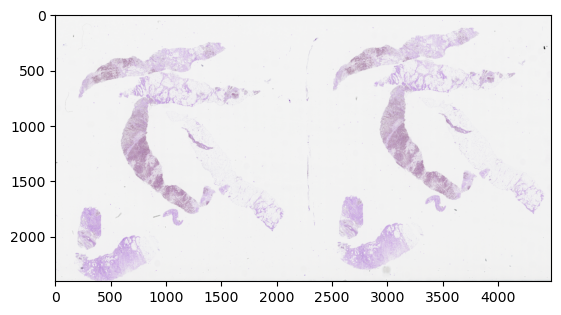

In [22]:
# image load and save the shape
file = base_path + train_df['img_path'].iloc[652][1:]
image = cv2.imread(file)
y_orig, x_orig, channel= image.shape
print(x_orig, y_orig)


plt.imshow(image)
plt.show()

(2403, 4481)
(2, 8121)


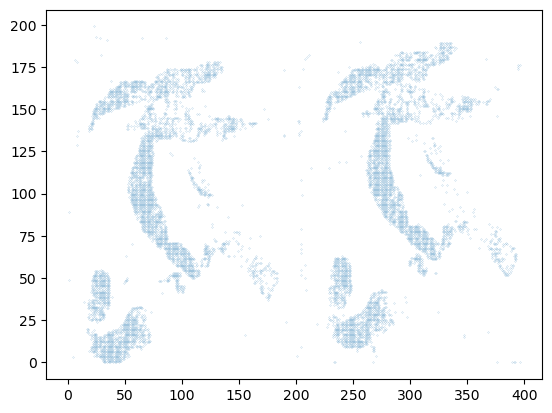

In [23]:
# gray scale, resize, 좌표화
gray_sample = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(gray_sample.shape)
gray_sample =cv2.flip(gray_sample, 0)

gray_sample = cv2.resize(gray_sample, dsize=(400, 200), interpolation=cv2.INTER_LINEAR) 

mask = cv2.threshold(gray_sample, 235, 255, cv2.THRESH_BINARY)[1]

coord = np.where( gray_sample < 220 )
co_array = np.array(coord)
print(co_array.shape)

co_array = np.float32(co_array)

plt.scatter(co_array[1], co_array[0], s=1e-2 )

In [24]:
from numpy.linalg import norm

#From t.ly/TLq_


class KMeans():
    def __init__(self, n_clusters, max_iter = 30, random_state = 60):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
    def initialize_centroids(self, X): # center 초기화 - 이미지 내 특정 점으로 고정
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
#         fixed_points = np.array(
#             [[X.shape[0]*2/5,  X.shape[0]*4/5 ,X.shape[1]*1/5, X.shape[1]*3/5], 
#             [X.shape[1]/2, X.shape[1]/2, X.shape[1]/2, X.shape[1]/2]]
#             , dtype = int)
#         centroids = fixed_points[:self.n_clusters]
        centroids = X[random_idx[:self.n_clusters]]
        return centroids
        
    def compute_centroids(self, X, labels): # centroids 계산 
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids
        
    def compute_distance(self, X, centroids): #
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance
    
    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)
    
    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
 
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.find_closest_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
        # return self.labels
        
    def predict(self, X):
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)

In [25]:
co_array =co_array.T

K=4 :  0.48734835
K=3 :  0.5456019


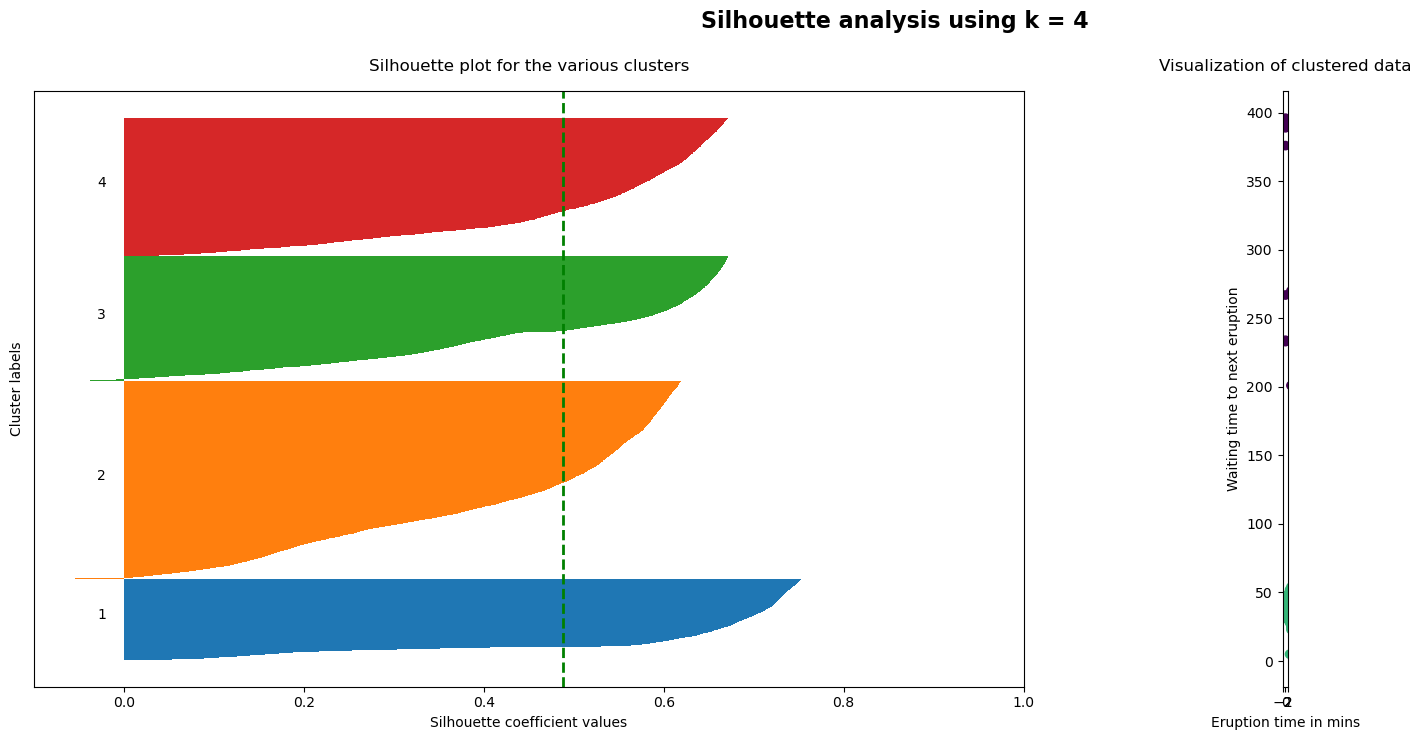

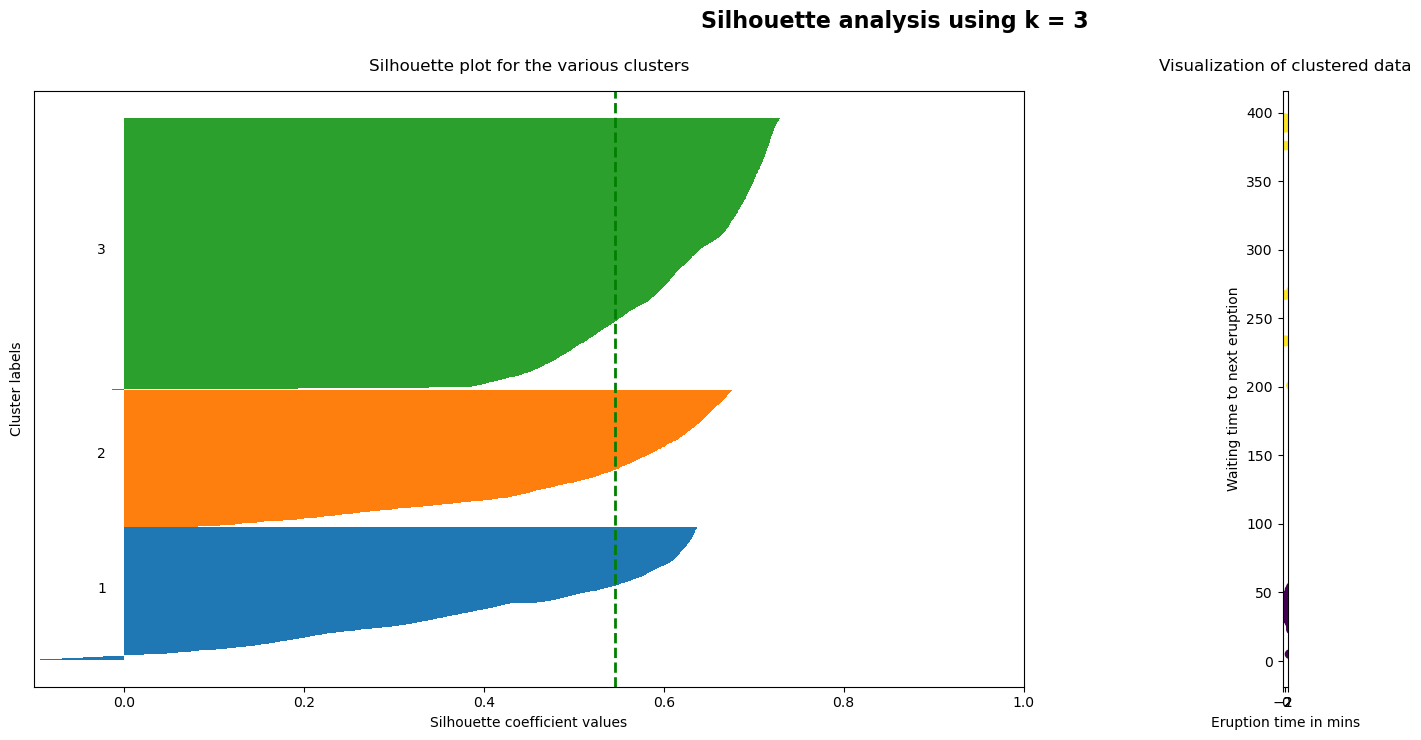

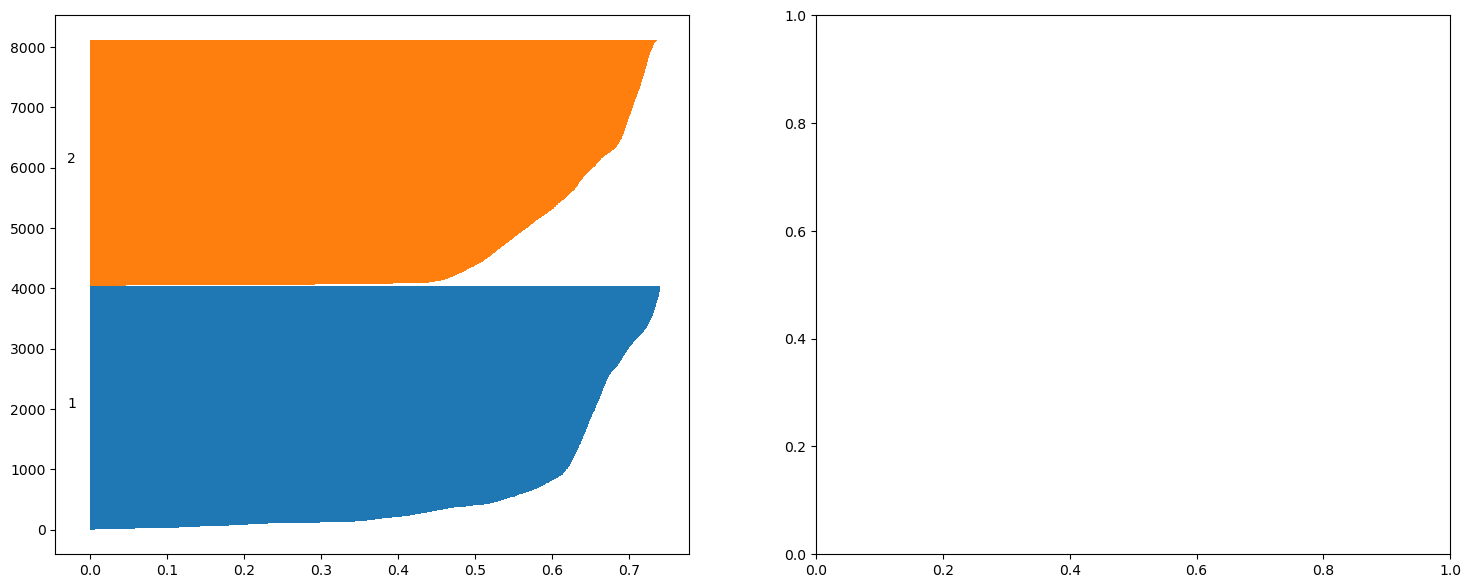

In [26]:
# K mean evaluation with silhoueete analysis 
#data = co_array

from sklearn.metrics import silhouette_samples, silhouette_score

best_score = 0
best_k = 1
best_centroids = []

for i, k in enumerate([4, 3, 2]):

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    km.fit(co_array)
    labels = km.predict(co_array) # input data

    centroids = km.compute_centroids(co_array, labels) 

    # Get silhouette samples
    silhouette_vals = silhouette_samples(co_array, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals) ## score 

    if best_score < avg_score:
        if best_k == 3 and k ==2 and (avg_score-best_score) < 0.09:
            break
        best_score = avg_score
        best_k = k
        best_centroids = centroids
        x_coord = centroids[ : , 1]
        x_coord.sort()        
        if best_k == 2:
            x1, x2 = x_coord
        elif best_k ==3  :
            x1, x2, x3 = x_coord
        elif best_k ==4  :
            x1, x2, x3, x4 = x_coord
            
 
    ### 시각화
    print(f'K={k} : ', avg_score)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(co_array[:, 0], co_array[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);



In [36]:
best_centroids

array([[ 43.30757523,  68.15303802],
       [138.36079407,  79.27011108],
       [101.49742126, 282.93695068]])

[[ 91.52822113  73.68292236]
 [101.47537231 282.83926392]]


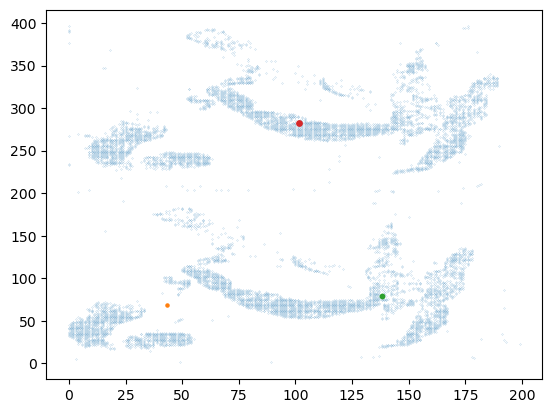

In [37]:
print(centroids)

plt.scatter(co_array.T[0], co_array.T[1], s=1e-2 )
plt.scatter(best_centroids[0][0], best_centroids[0][1], s=5 )
plt.scatter(best_centroids[1][0], best_centroids[1][1], s=10 )
plt.scatter(best_centroids[2][0], best_centroids[2][1], s=15 )
#plt.scatter(centroids[3][0], centroids[3][1], s=20 )
plt.show()

In [29]:
x1, x2, x3

(68.15303802490234, 79.27011108398438, 282.93695068359375)

-313 2089
825 2028


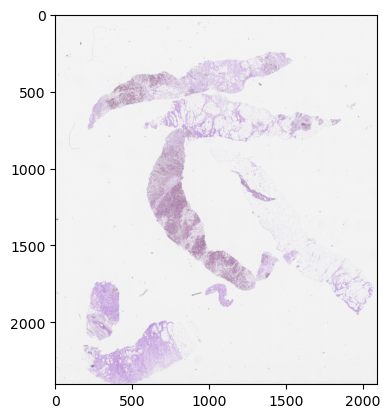

In [38]:
# 좌표 재계산, crop

if best_k == 2:
    crop_image = image[:, : int( (x1+x2)/2  *x_orig / 400 ), :]
elif best_k > 2:
    # crop_image = image[:, int((x1+x2)/2 * x_orig/400): int((x2+x3/2)*x_orig/400), : ]
    # crop_image = image[:, int((x1+x3)/2 * x_orig/400) : , : ] #x1, x3 사이가 중간점
    alpha = int(y_orig / 2)
    print(int(x2 *x_orig /400) -alpha  , int(x2 *x_orig /400) +alpha  )
    print(int(((x1+x2)/2) * x_orig/400) , int(((x2+x3)/2)*x_orig/400))
    crop_image = image[:, max(0, int(x2 *x_orig /400) -alpha)  :int(x2 *x_orig /400) +alpha  , : ]
#     except ValueError: # almost ValueError
#         crop_image = image[:, int(((x1+x2)/2) * x_orig/400) : int(((x2+x3)/2)*x_orig/400), : ]

# 문제점 : 셋 중 하나가 0이 될 경우가 생김 
   # except: 
     #   crop_image = image[:, : int( (x1+x2)/2  *x_orig / 400 ), :]
plt.imshow(crop_image)
plt.show()

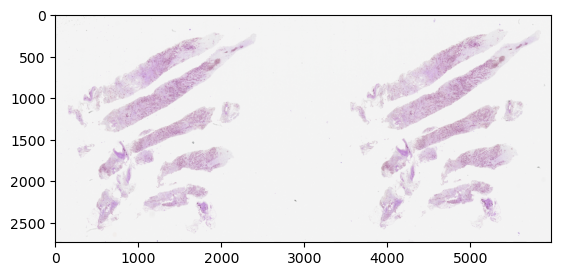

In [45]:
plt.imshow(image)
plt.show()